## CCT College Dublin

**Assessment Cover Page**
_______________________________________________________________________

**Module Title: Data Preparation & Visualisation, Statistical Techniques for Data Analytics, Machine Learning** 

**Program Title:** CA2_Higher Diploma in Data Analytics for Business
    
**Lecturer Name:** David McQuaid - Data Preparation & Visualisation 
    
**Lecturer Name:**  Marina Iantorno - Statistical Techniques for Data Analytics   
    
**Lecturer Name:**  Dr Muhammad Iqbal - Machine Learning 
    
**Students Full Name:**  Miroslava Slavikova  
**Students Number:**  SBA22382     
**Assessment Due Date:**  5 January 2024  
**Date of Submission:**  2 January 2024 



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv("Employee_Attrition.csv")

In [3]:
df.head()

Age Attrition     BusinessTravel    DailyRate  \
0  41.920786       Yes      Travel_Rarely   990.110009   
1  51.589037        No  Travel_Frequently   276.776030   
2  33.131540       Yes      Travel_Rarely  1204.158501   
3  34.707073        No  Travel_Frequently  1352.752432   
4  24.790188        No      Travel_Rarely   485.053333   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales          1.016716   1.770313  Life Sciences   
1  Research & Development               NaN   1.035333  Life Sciences   
2  Research & Development          2.198662   2.118801          Other   
3                   Sales          2.937851   3.670674  Life Sciences   
4  Research & Development          1.988953   1.120496        Medical   

   EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0       1.033298        1.054148  ...                  1.012832     95.612654   
1       0.944859        2.107031  ...                  4.312008     85.370868   
2       0.810809        4.008125  ...                  2.332558     76.248084   
3       0.822976        4.587269  ...                  3.029591     75.888697   
4            NaN        7.228740  ...                       NaN     72.670937   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0          0.000000           8.063833               0.000000        1.052104   
1          1.104642           8.965059               3.264952        2.526470   
2          0.000000           8.427238               3.004521        2.924784   
3          0.000000           7.662606               2.856001        3.117053   
4          0.953012           6.241733               2.814719        3.112317   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0        5.795945           3.993896                 0.000000   
1       10.070232           7.937505                 1.032295   
2        0.000000           0.000000                 0.000000   
3        8.435324           5.563667                 2.845429   
4        2.040124           1.970786                 2.495949   

   YearsWithCurrManager  
0              4.594972  
1              5.901207  
2              0.000000  
3              0.000000  
4              2.219353  

[5 rows x 35 columns]

## Data Preprocessing

## Dataset Overview


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel



## Checking for Null Values


In [6]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

This dipslays the distrubution of missing data accross the data set

<Axes: >

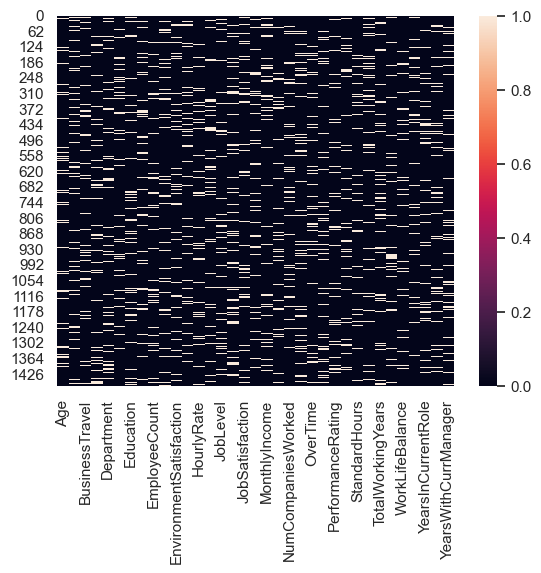

In [7]:
sns.heatmap(df.isnull())

## Imputing Missing Values
### Numeric Values with Mean


Imputing missing values with the Mean involves replacing NaN entries with the average value. Numeric with Mean and categorical with Mode.

In [8]:
num = df.select_dtypes(include = np.number).columns
df[num]=df[num].apply(pd.to_numeric,errors='coerce')
df[num]=df[num].fillna(df[num].mean())
df[num]

Age    DailyRate  DistanceFromHome  Education  EmployeeCount  \
0     41.920786   990.110009          1.016716   1.770313       1.033298   
1     51.589037   276.776030          9.091097   1.035333       0.944859   
2     33.131540  1204.158501          2.198662   2.118801       0.810809   
3     34.707073  1352.752432          2.937851   3.670674       0.822976   
4     24.790188   485.053333          1.988953   1.120496       0.999325   
...         ...          ...               ...        ...            ...   
1465  37.421699   914.061807         21.647903   2.923447       0.950166   
1466  34.957777   574.675152          6.027683   1.122961       1.064563   
1467  26.884296   151.506083          9.091097   3.478895       0.960908   
1468  36.635268   995.977086          2.094496   2.956093       0.873312   
1469  38.133892   703.677110          7.231661   3.292684       1.061133   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0           1.054148                 2.146294   93.827486        3.426960   
1           2.107031                 3.470803   52.304157        1.813458   
2           4.008125                 3.979420   87.271332        1.877226   
3           4.587269                 3.734705   56.378982        2.932646   
4           7.228740                 1.079412   40.433887        3.117739   
...              ...                      ...         ...             ...   
1465     2142.083554                 3.171444   65.647722        3.372679   
1466     2221.578902                 4.284094   39.842324        2.038727   
1467     1026.679166                 2.152282   91.603642        4.394863   
1468     2086.654641                 4.095580   59.110216        2.019760   
1469     1026.679166                 1.738502   67.262829        4.478969   

      JobLevel  ...  RelationshipSatisfaction  StandardHours  \
0     2.464492  ...                  1.012832      95.612654   
1     1.788697  ...                  4.312008      85.370868   
2     0.833488  ...                  2.332558      76.248084   
3     1.095372  ...                  3.029591      75.888697   
4     0.937746  ...                  2.720431      72.670937   
...        ...  ...                       ...            ...   
1465  1.993840  ...                  3.020184      85.835352   
1466  2.532482  ...                  1.014690      94.868401   
1467  1.964613  ...                  1.952083      93.310094   
1468  1.925025  ...                  4.182100      83.920873   
1469  2.291543  ...                  1.076817      82.610288   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             0.000000           8.063833               0.000000   
1             1.104642           8.965059               3.264952   
2             0.000000           8.427238               3.004521   
3             0.000000           7.662606               2.856001   
4             0.953012           6.241733               2.814719   
...                ...                ...                    ...   
1465          0.962354          11.426152               3.451951   
1466          0.923291          11.426152               5.122188   
1467          1.096556           6.278564               0.000000   
1468          0.000000          15.235372               3.338546   
1469          0.000000           6.493763               3.451604   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0            1.052104        5.795945            3.993896   
1            2.526470       10.070232            7.937505   
2            2.924784        0.000000            0.000000   
3            3.117053        8.435324            5.563667   
4            3.112317        2.040124            1.970786   
...               ...             ...                 ...   
1465         2.819336        5.436125            2.021736   
1466         2.560634        7.428423            7.504109   
1467         2.587121        5.965205  

In [9]:
# Example: Fill missing categorical values with the most frequent value
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [10]:
df[categorical_cols]

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently                   Sales  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently         Human Resources        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus Over18 OverTime  
0       Male            Sales Executive        Single      Y      Yes  
1       Male         Research Scientist       Married      Y       No  
2       Male      Laboratory Technician        Single      Y      Yes  
3     Female         Research Scientist       Married      Y      Yes  
4       Male      Laboratory Technician       Married      Y       No  
...      ...                        ...           ...    ...      ...  
1465    Male      Laboratory Technician       Married      Y       No  
1466    Male  Healthcare Representative       Married      Y       No  
1467    Male     Manufacturing Director       Married      Y      Yes  
1468    Male            Sales Executive       Married      Y       No  
1469    Male      Laboratory Technician       Married      Y       No  

[1470 rows x 9 columns]

Replacing categorical values with the most accuring values

## Data Preparation and Exploration

In [11]:
sns.heatmap(df.isnull())

<Axes: >

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Replacing missing values with mean values for each column

In [13]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000    1470.000000   
mean     36.635268   802.030050          9.091097     2.923447       0.999325   
std       9.374687   392.769463          7.757915     1.017143       0.094539   
min      14.544608    86.828045          0.750112     0.770362       0.628985   
25%      30.357410   502.681603          2.265377     2.200839       0.938491   
50%      36.262348   802.030050          7.871631     2.923447       0.999325   
75%      41.714666  1101.063049         11.525354     3.598201       1.059647   
max      69.402515  1784.394456         33.684424     6.285161       1.290613   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1026.679166                 2.726443    65.647722        2.743028   
std        579.131037                 1.071667    20.367184        0.726254   
min          1.054148                 0.759655    23.855272        0.722008   
25%        539.350448                 1.956071    49.027545        2.260665   
50%       1026.679166                 2.726443    65.647722        2.779384   
75%       1469.776833                 3.501999    81.466110        3.139241   
max       2530.919375                 5.254672   123.200439        5.241968   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000    1470.000000   
mean      2.058270  ...                  2.720431      80.241313   
std       1.069143  ...                  1.058652       7.610557   
min       0.715172  ...                  0.720696      53.793059   
25%       1.065687  ...                  1.967961      75.457008   
50%       1.999218  ...                  2.749160      80.241313   
75%       2.310216  ...                  3.475659      84.947190   
max       5.942269  ...                  5.092280     107.378705   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.814757          11.426152               2.811756   
std            0.818755           7.661153               1.260794   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.338285               2.012541   
50%            0.856451          10.025634               2.811756   
75%            1.057531          14.198518               3.262780   
max            3.474319          47.641892               7.503201   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.762825        6.933624            4.233363   
std           0.722682        5.736280            3.470258   
min           0.799138        0.000000            0.000000   
25%           2.288428        2.976554            1.895985   
50%           2.811240        5.951131            3.493610   
75%           3.169524        8.797517            6.756694   
max           4.856086       36.848408           19.091844   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.160710              4.117695  
std                   3.056050              3.409489  
min                   0.000000              0.000000  
25%                   0.000000              1.812728  
50%                   1.035323              3.407985  
75%                   2.160710              6.739316  
max                  17.273662             19.976003  

[8 rows x 26 columns]

In [14]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.002793         -0.003955   0.196264   
DailyRate                 0.002793   1.000000         -0.003768  -0.011011   
DistanceFromHome         -0.003955  -0.003768          1.000000   0.010769   
Education                 0.196264  -0.011011          0.010769   1.000000   
EmployeeCount            -0.011310   0.008580          0.005250  -0.034053   
EmployeeNumber           -0.003227  -0.044783          0.031684   0.031758   
EnvironmentSatisfaction  -0.010647   0.017897         -0.027628   0.006738   
HourlyRate                0.024101   0.028444          0.023357   0.002878   
JobInvolvement            0.020492   0.046287         -0.005367   0.030511   
JobLevel                  0.423806  -0.011954          0.020679   0.094814   
JobSatisfaction          -0.006176   0.029642          0.019789   0.003623   
MonthlyIncome             0.405729   0.013068         -0.002322   0.083233   
MonthlyRate               0.026507  -0.047566          0.018547  -0.018367   
NumCompaniesWorked        0.253144   0.067315         -0.009149   0.110446   
PercentSalaryHike         0.004621   0.011176          0.045968  -0.019211   
PerformanceRating         0.012401   0.001186         -0.008717  -0.028452   
RelationshipSatisfaction  0.022500   0.017572          0.022494  -0.017281   
StandardHours             0.001870  -0.036248         -0.002335   0.009294   
StockOptionLevel          0.038462   0.006384          0.036067   0.007709   
TotalWorkingYears         0.568422   0.012495          0.003805   0.129922   
TrainingTimesLastYear    -0.018877  -0.008186         -0.042229  -0.030998   
WorkLifeBalance          -0.031854  -0.031624         -0.016178  -0.003973   
YearsAtCompany            0.245315  -0.034963          0.021427   0.068853   
YearsInCurrentRole        0.161113   0.006288          0.018096   0.066096   
YearsSinceLastPromotion   0.164664  -0.020973         -0.004784   0.044889   
YearsWithCurrManager      0.165176  -0.035838          0.030401   0.059017   

                          EmployeeCount  EmployeeNumber  \
Age                           -0.011310       -0.003227   
DailyRate                      0.008580       -0.044783   
DistanceFromHome               0.005250        0.031684   
Education                     -0.034053        0.031758   
EmployeeCount                  1.000000        0.056851   
EmployeeNumber                 0.056851        1.000000   
EnvironmentSatisfaction        0.023366        0.036685   
HourlyRate                     0.051122        0.003195   
JobInvolvement                -0.035537       -0.015014   
JobLevel                       0.003601       -0.003805   
JobSatisfaction                0.010125       -0.029654   
MonthlyIncome                 -0.004313       -0.012639   
MonthlyRate                   -0.031124        0.024371   
NumCompaniesWorked             0.010114       -0.028238   
PercentSalaryHike             -0.020838       -0.017941   
PerformanceRating             -0.011726       -0.019293   
RelationshipSatisfaction       0.014156       -0.065990   
StandardHours                 -0.003120        0.000235   
StockOptionLevel              -0.034454        0.057308   
TotalWorkingYears              0.002473       -0.017575   
TrainingTimesLastYear         -0.048657       -0.006091   
WorkLifeBalance               -0.003623        0.018971   
YearsAtCompany                 0.016372       -0.002319   
YearsInCurrentRole             0.014349       -0.015795   
YearsSinceLastPromotion       -0.003968       -0.007606   
YearsWithCurrManager          -0.029948       -0.018870   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                     -0.010647    0.024101        0.020492   
DailyRate                                0.017897    0.028444        0.046287   
DistanceFromHome                        -0.027628    0.023357       -0.005367   
Educat

dark ones show correlation btw features

<Axes: >

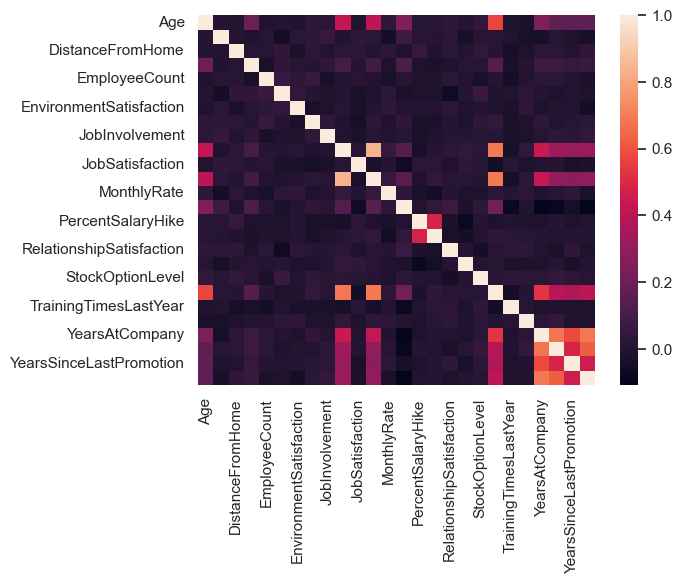

In [15]:
sns.heatmap(numeric_df.corr())

<Axes: >

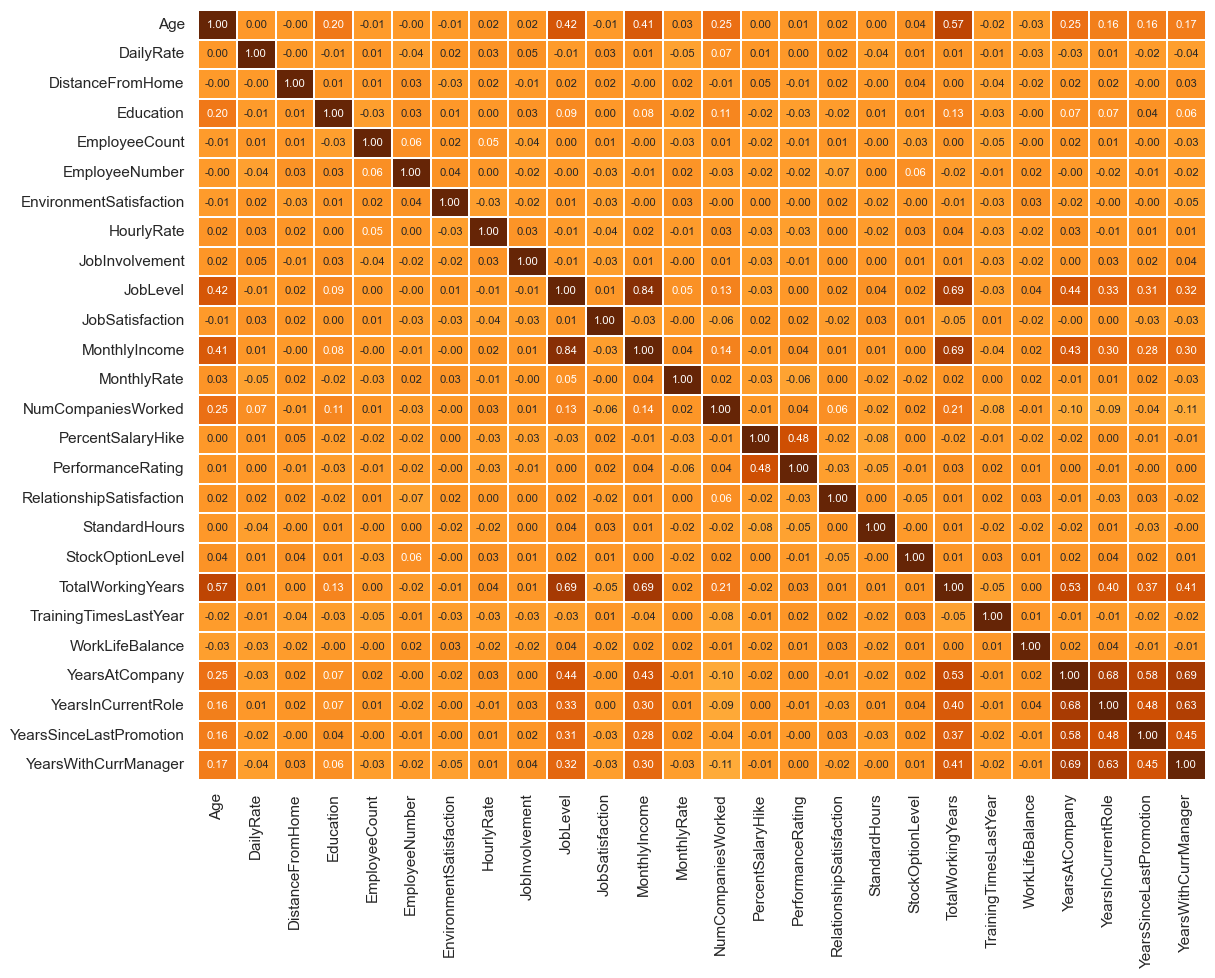

In [16]:
plt.figure(figsize=(13,10))
sns.heatmap(numeric_df.corr(),annot=True,linewidths = 0.1,cmap = 'YlOrBr', fmt=".2f",
            vmin = -1, vmax = 1, linecolor = 'white', cbar = False,annot_kws={'size': 8})

In [17]:
df['MonthlyIncome'].mean()

6544.718400736938

In [18]:
df.groupby(df['MonthlyIncome'])

# Exploratory Data Analysis (EDA) using FastEDA

In [19]:
!pip install fasteda

this is library that helps to perform EDA more effecttively source: https://pypi.org/project/fasteda/

DataFrame Head:


Age    DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  41.920786   990.110009          1.016716   1.770313       1.033298   
1  51.589037   276.776030          9.091097   1.035333       0.944859   
2  33.131540  1204.158501          2.198662   2.118801       0.810809   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0        1.054148                 2.146294   93.827486        3.426960   
1        2.107031                 3.470803   52.304157        1.813458   
2        4.008125                 3.979420   87.271332        1.877226   

   JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
0  2.464492         3.397665    6438.949336  20845.103714            7.077818   
1  1.788697         1.584059    4457.659622  24877.898697            1.114423   
2  0.833488         3.301009    2124.545220   2262.942954            5.539591   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0           9.898765           2.844897                  1.012832   
1          15.295717           4.120281                  4.312008   
2          15.401596           2.781168                  2.332558   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0      95.612654          0.000000           8.063833               0.000000   
1      85.370868          1.104642           8.965059               3.264952   
2      76.248084          0.000000           8.427238               3.004521   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0         1.052104        5.795945            3.993896   
1         2.526470       10.070232            7.937505   
2         2.924784        0.000000            0.000000   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                 0.000000              4.594972  
1                 1.032295              5.901207  
2                 0.000000              0.000000

DataFrame Tail:


Age   DailyRate  DistanceFromHome  Education  EmployeeCount  \
1467  26.884296  151.506083          9.091097   3.478895       0.960908   
1468  36.635268  995.977086          2.094496   2.956093       0.873312   
1469  38.133892  703.677110          7.231661   3.292684       1.061133   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
1467     1026.679166                 2.152282   91.603642        4.394863   
1468     2086.654641                 4.095580   59.110216        2.019760   
1469     1026.679166                 1.738502   67.262829        4.478969   

      JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
1467  1.964613         2.152039    6609.842365  14364.334764   
1468  1.925025         2.715272    5585.302599  11837.891371   
1469  2.291543         2.875309    5188.877974  10276.024987   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
1467            1.017623          18.744411           3.149344   
1468            1.591695          12.930373           3.221402   
1469            2.364262          10.343964           3.053256   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
1467                  1.952083      93.310094          1.096556   
1468                  4.182100      83.920873          0.000000   
1469                  1.076817      82.610288          0.000000   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
1467           6.278564               0.000000         2.587121   
1468          15.235372               3.338546         1.989767   
1469           6.493763               3.451604         4.376818   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
1467        5.965205            1.822679                 0.000000   
1468        7.738712            6.562611                 0.000000   
1469        3.755110            3.308961                 1.070952   

      YearsWithCurrManager  
1467              3.271091  
1468              4.117695  
1469              2.025939

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(1470, 26)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   DailyRate                 1470 non-null   float64
 2   DistanceFromHome          1470 non-null   float64
 3   Education                 1470 non-null   float64
 4   EmployeeCount             1470 non-null   float64
 5   EmployeeNumber            1470 non-null   float64
 6   EnvironmentSatisfaction   1470 non-null   float64
 7   HourlyRate                1470 non-null   float64
 8   JobInvolvement            1470 non-null   float64
 9   JobLevel                  1470 

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



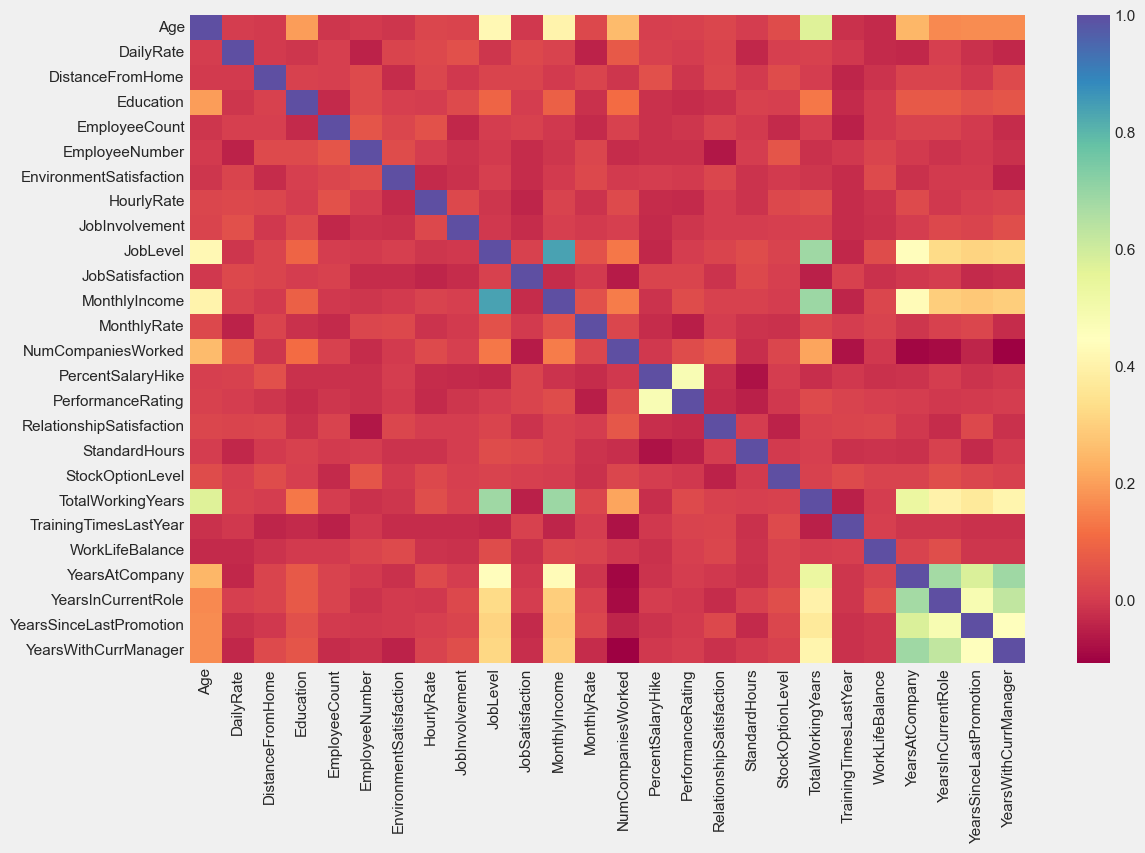

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



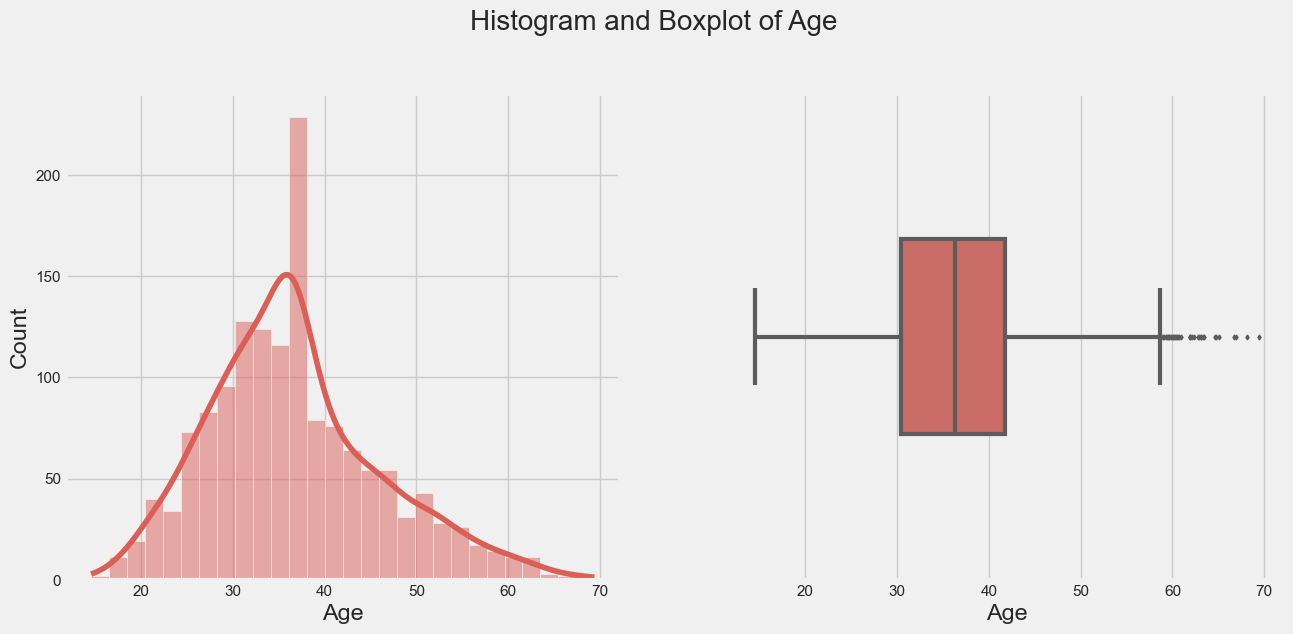

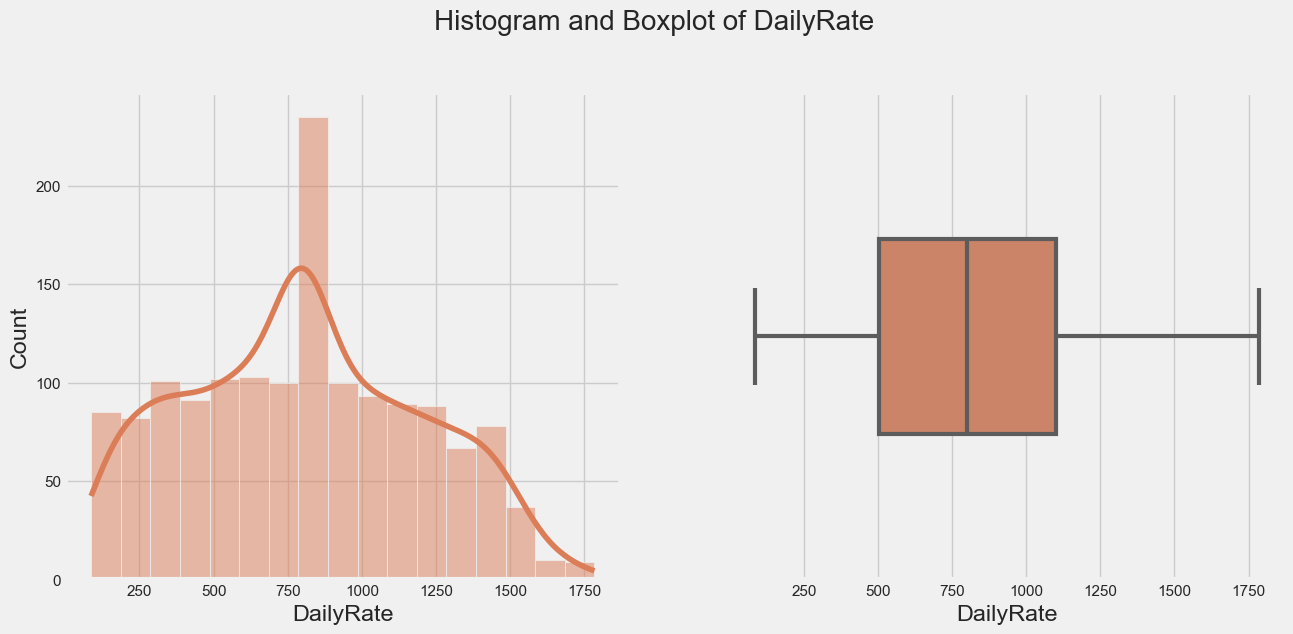

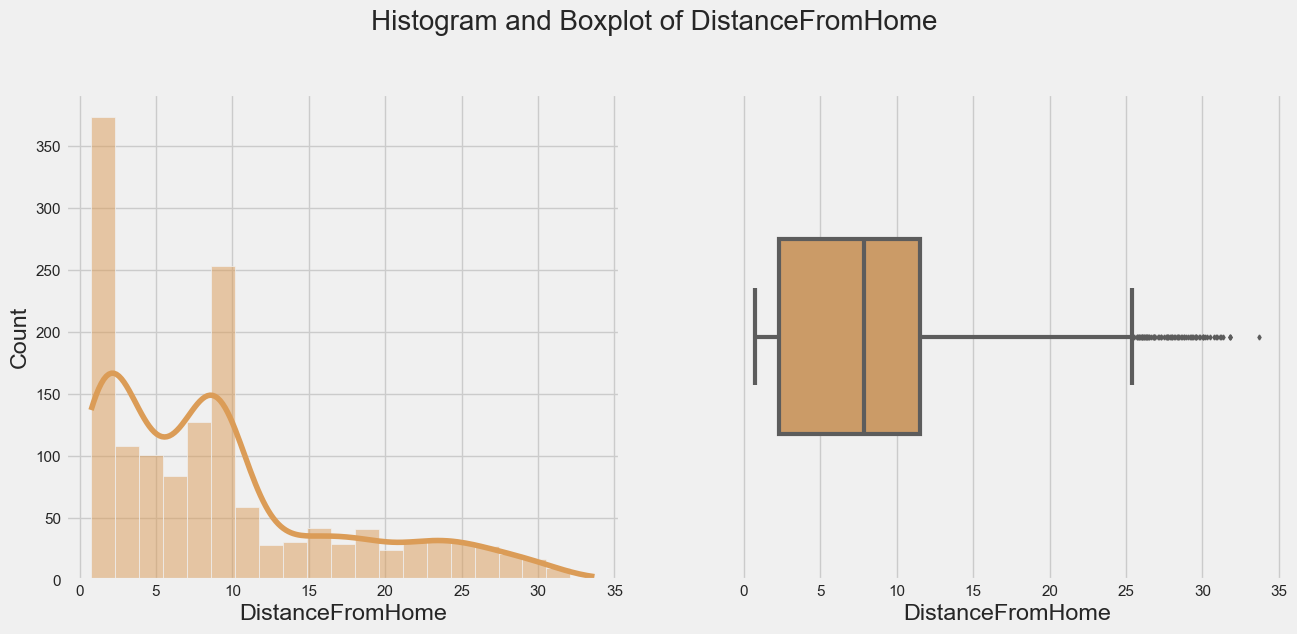

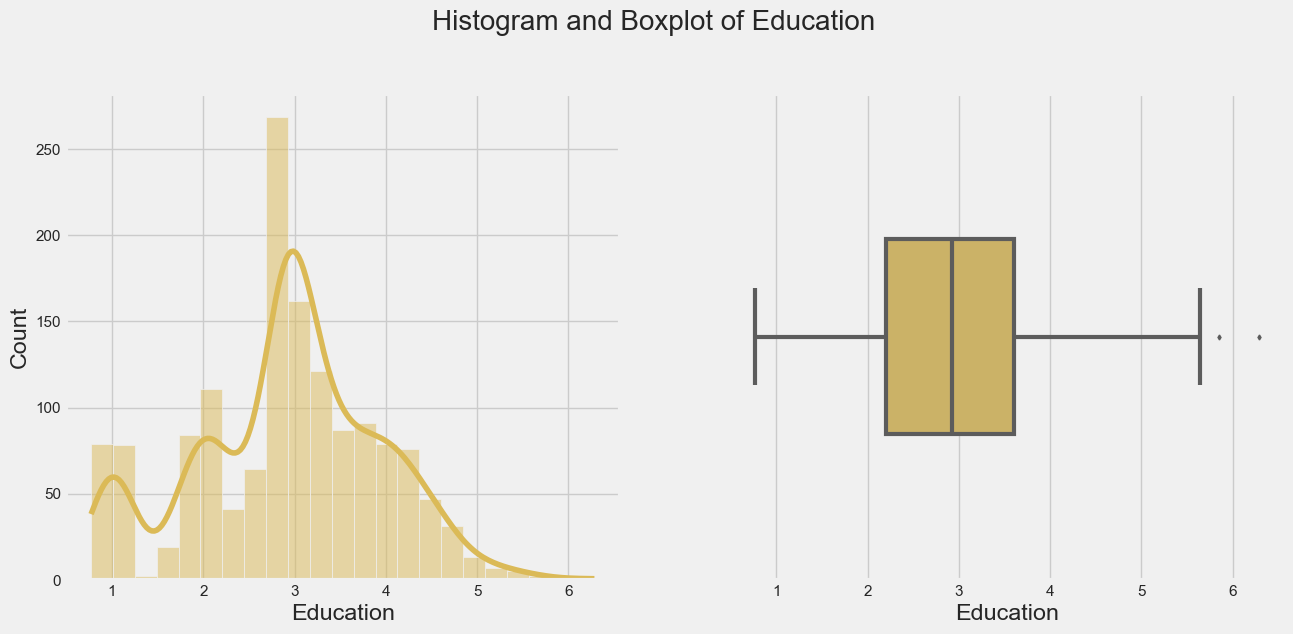

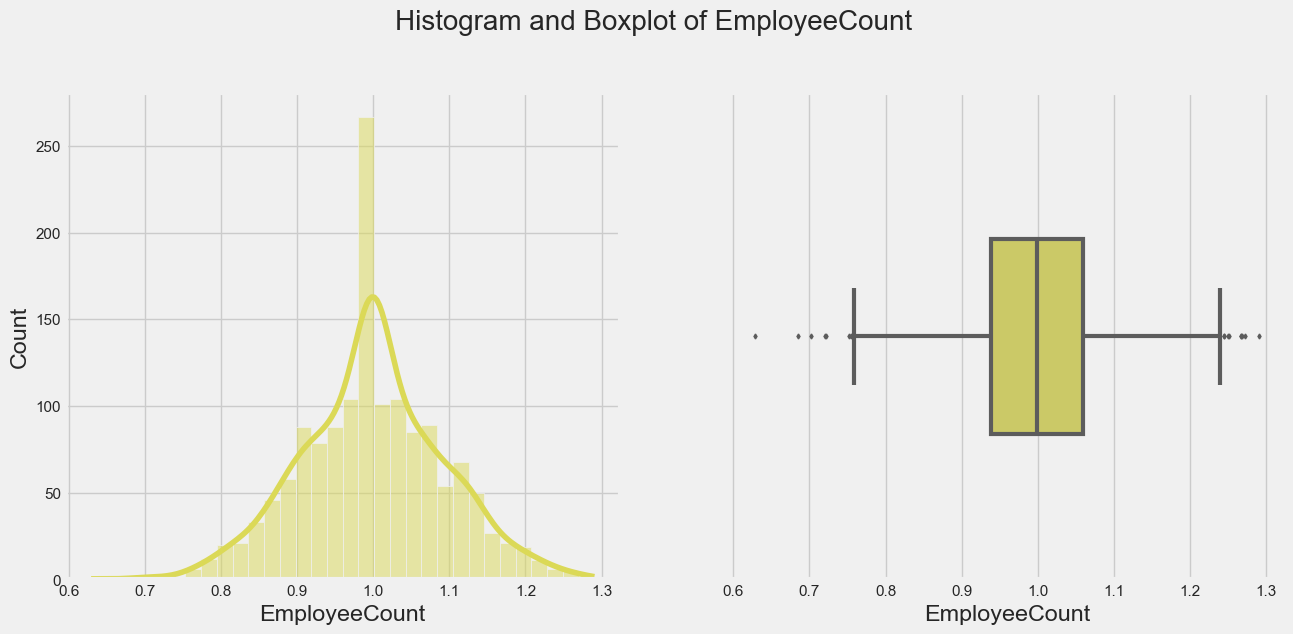

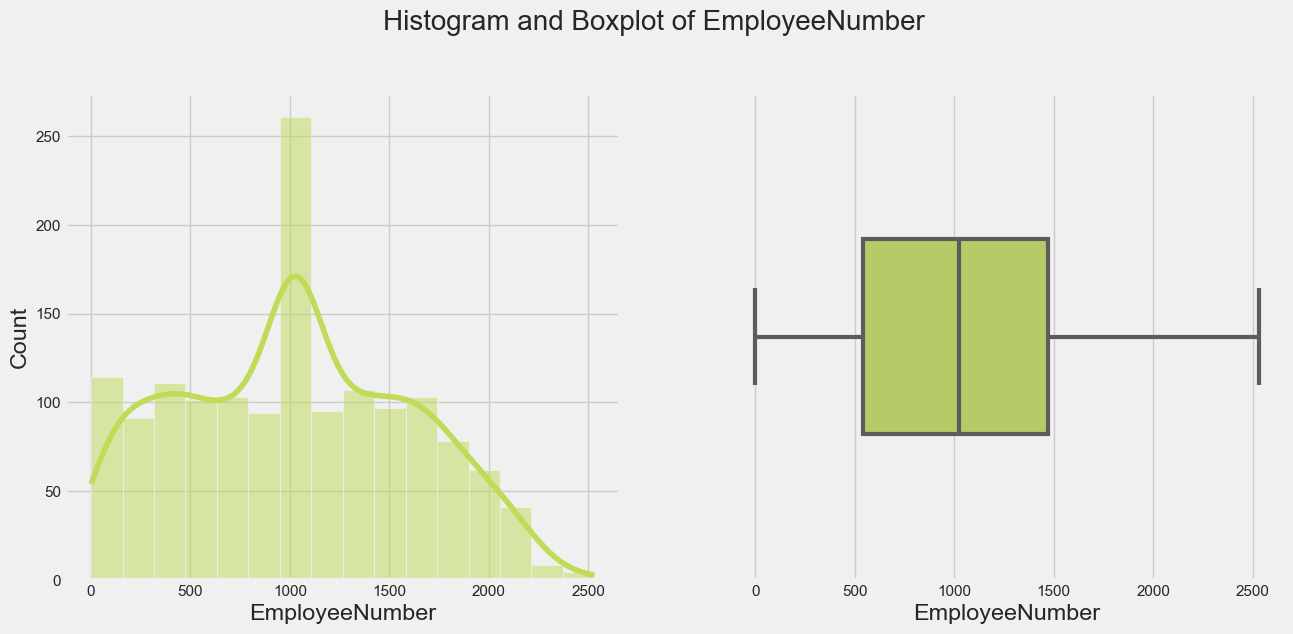

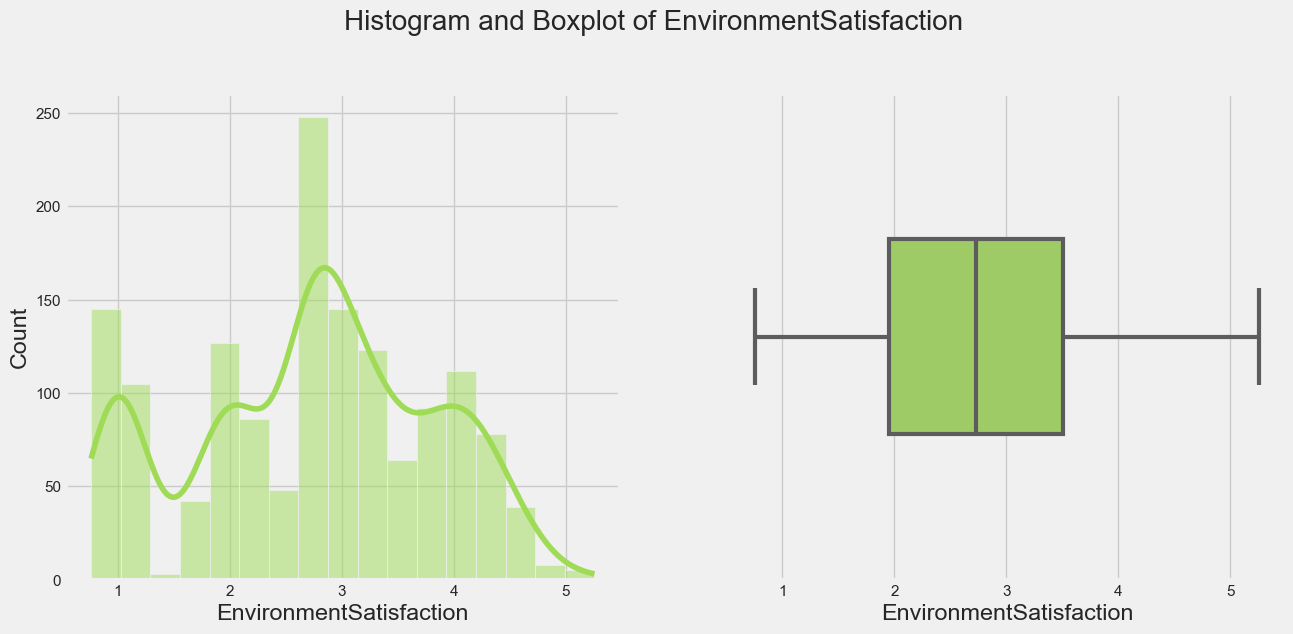

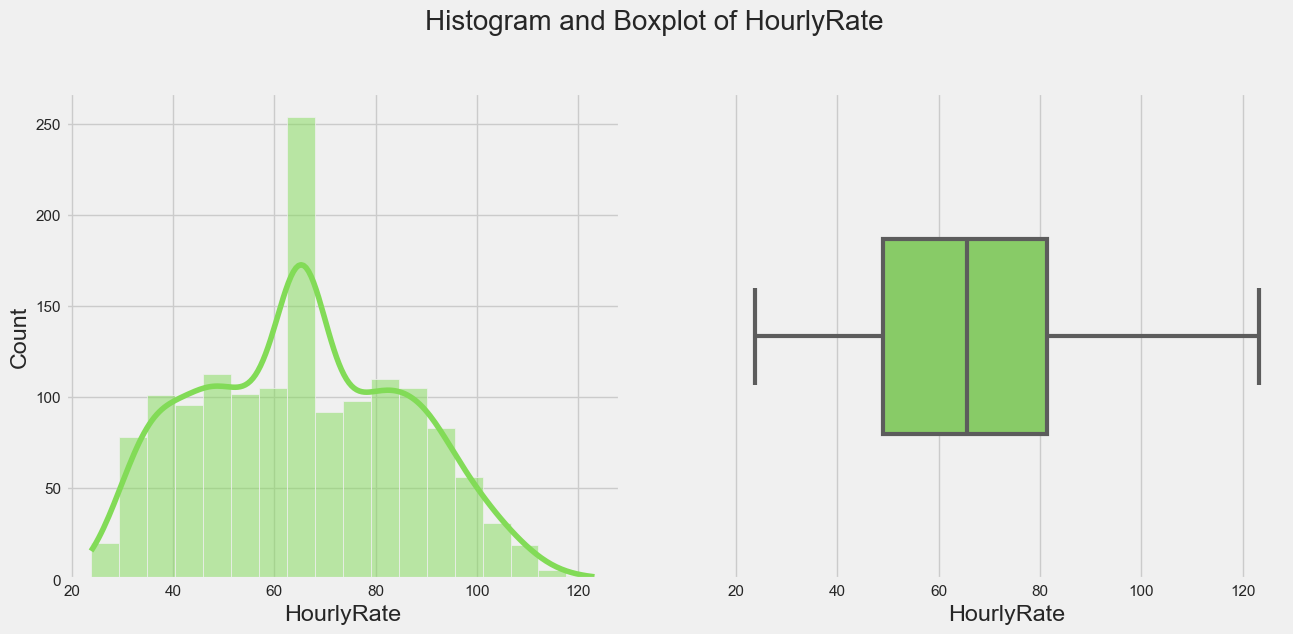

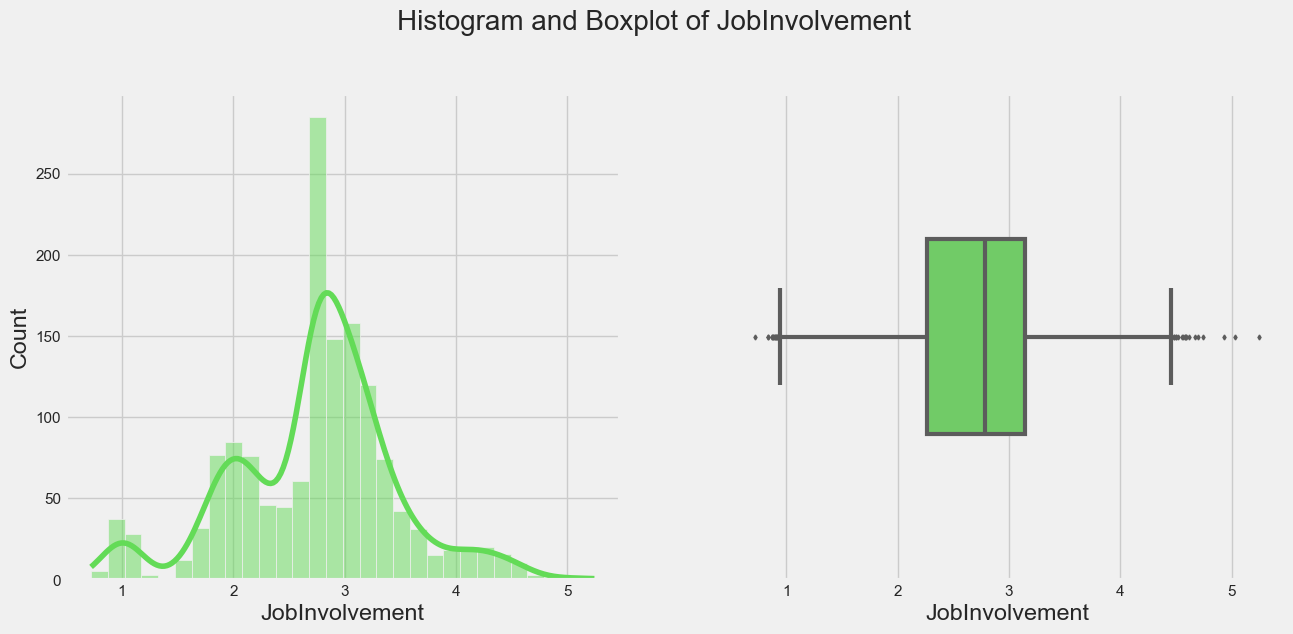

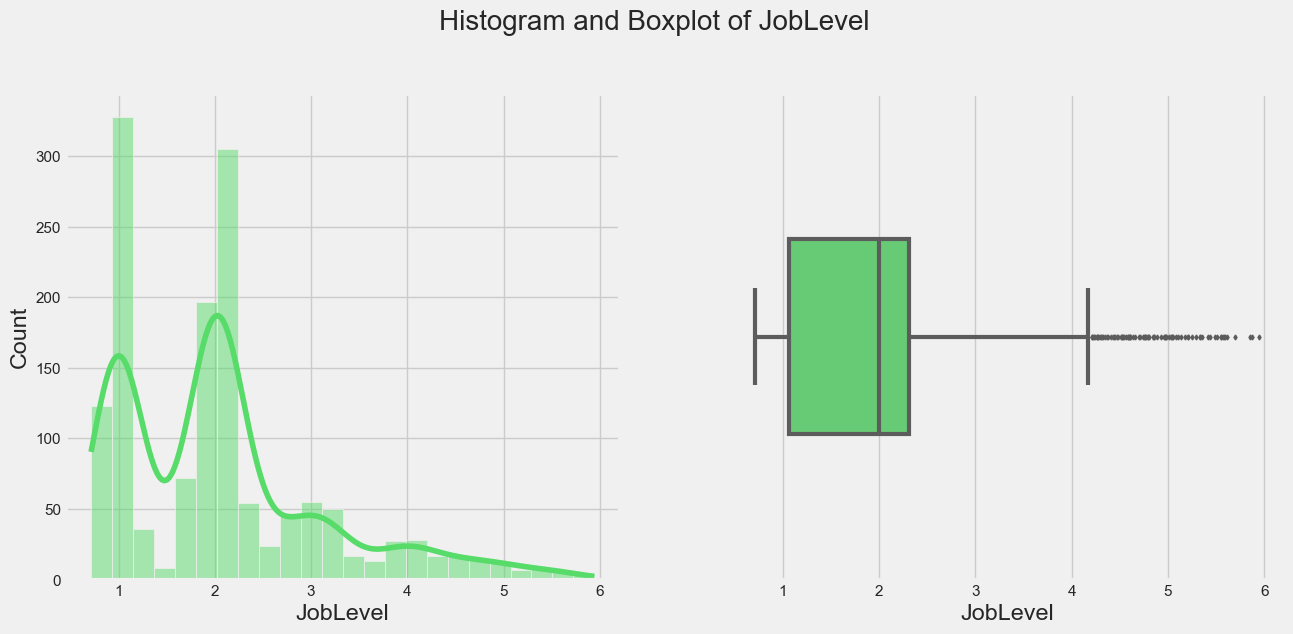

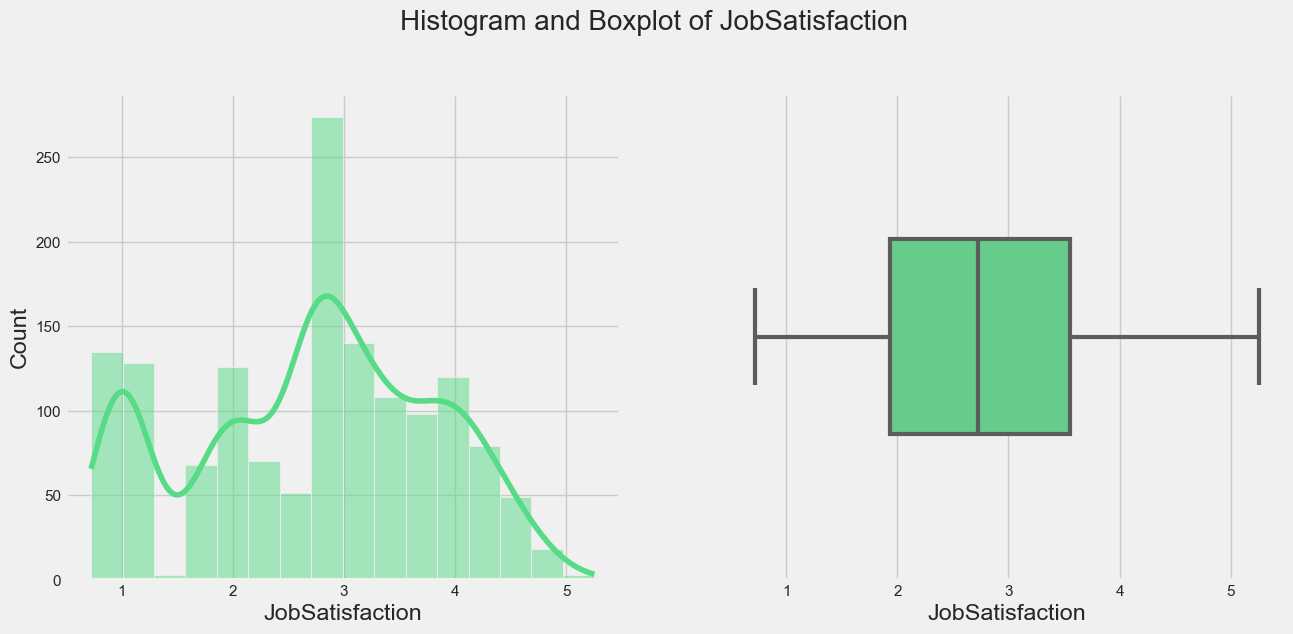

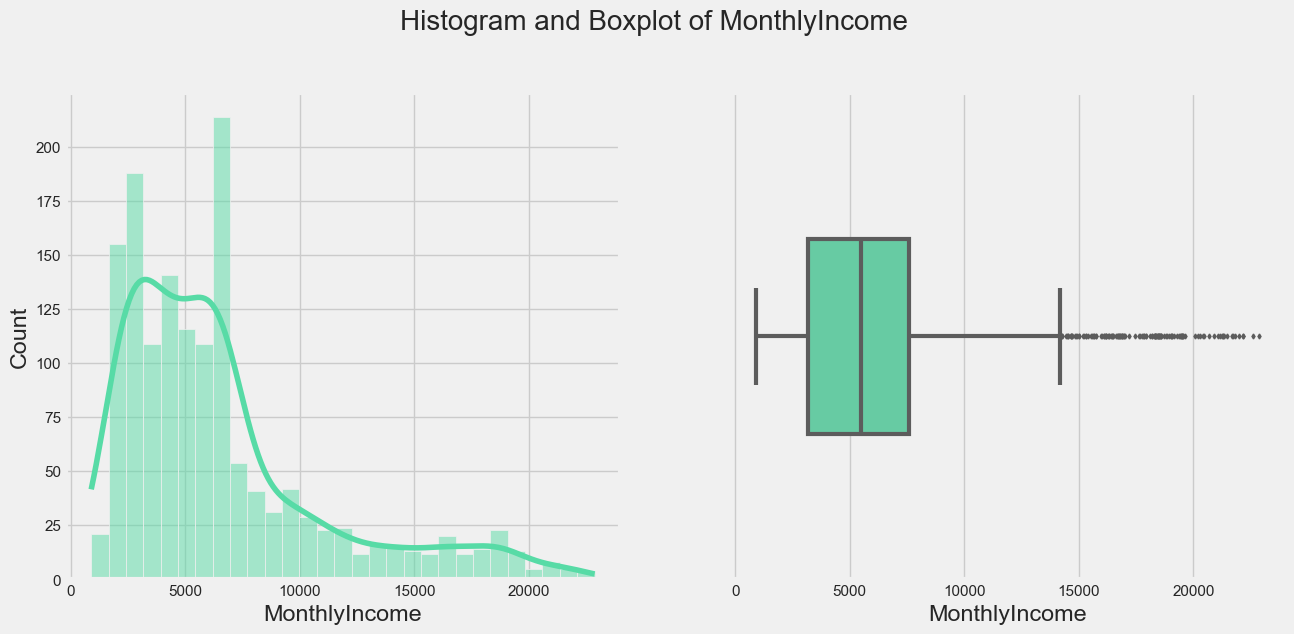

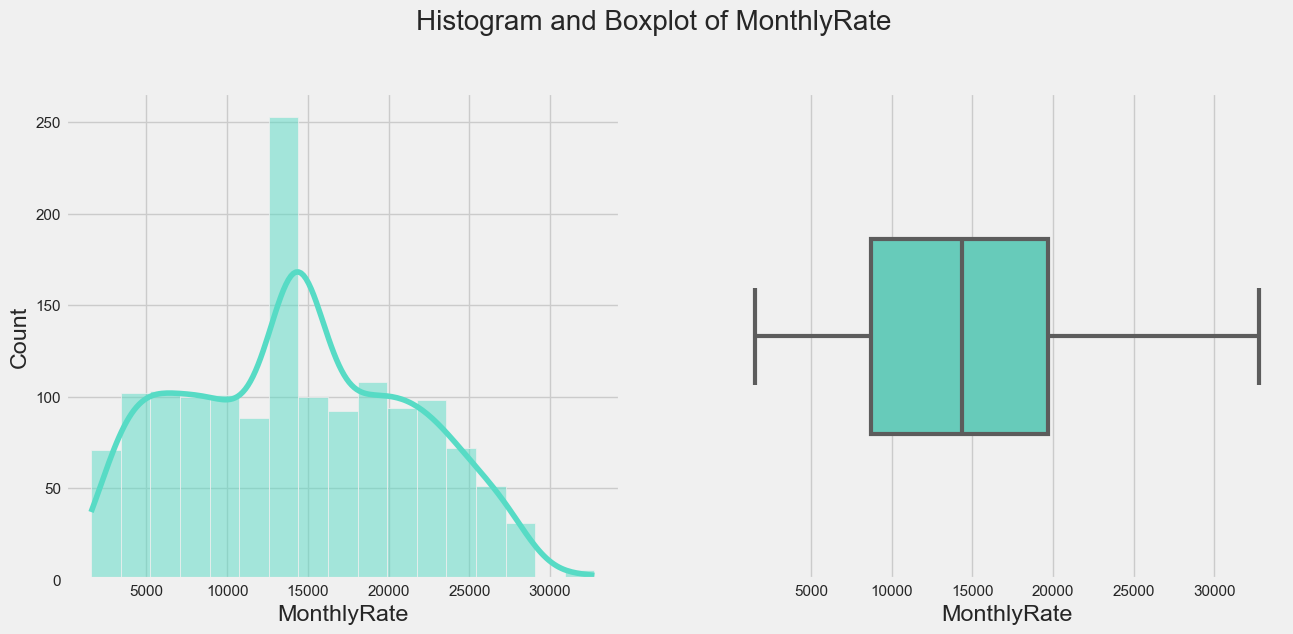

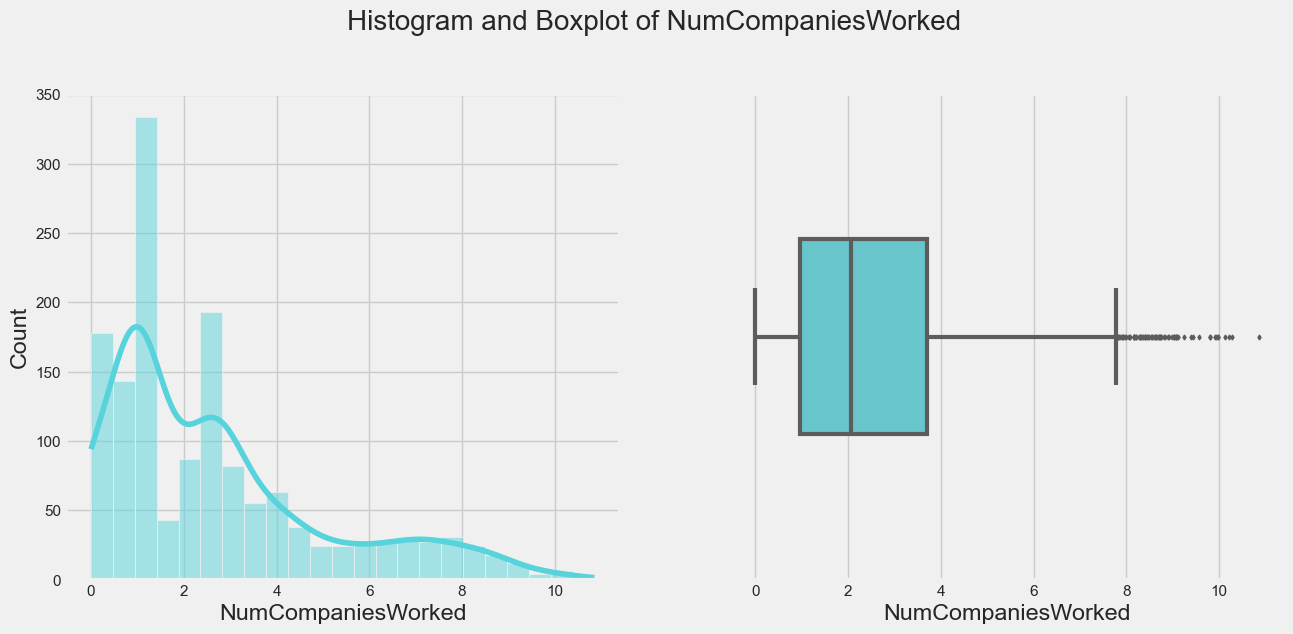

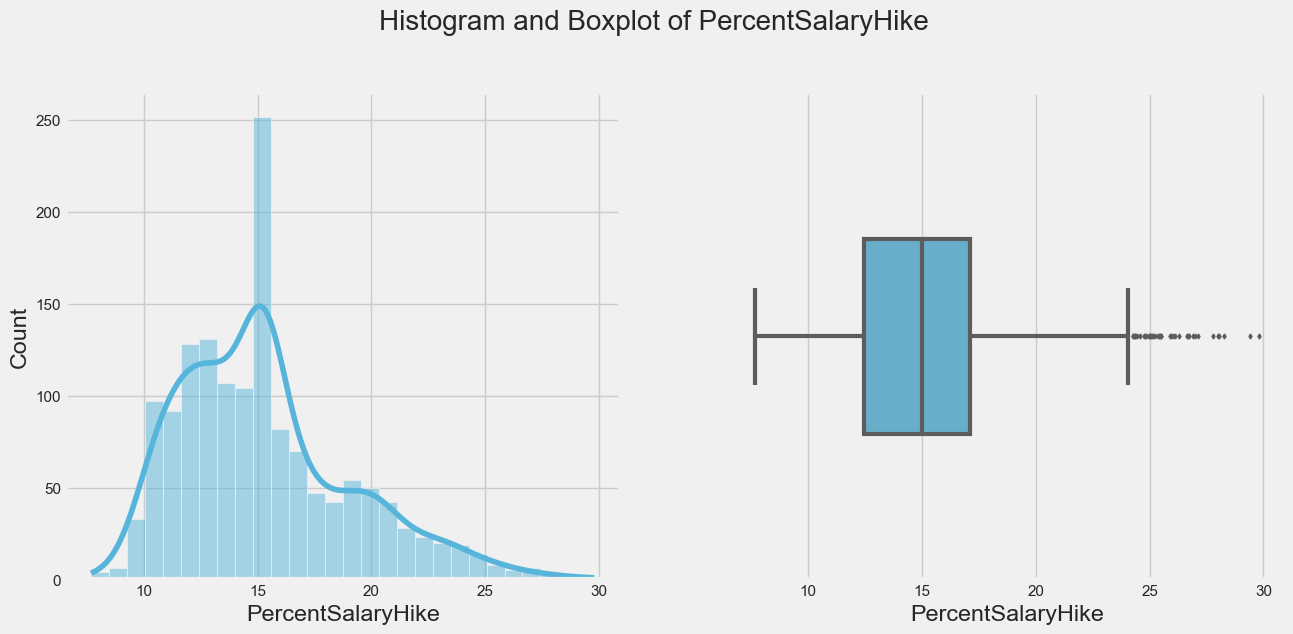

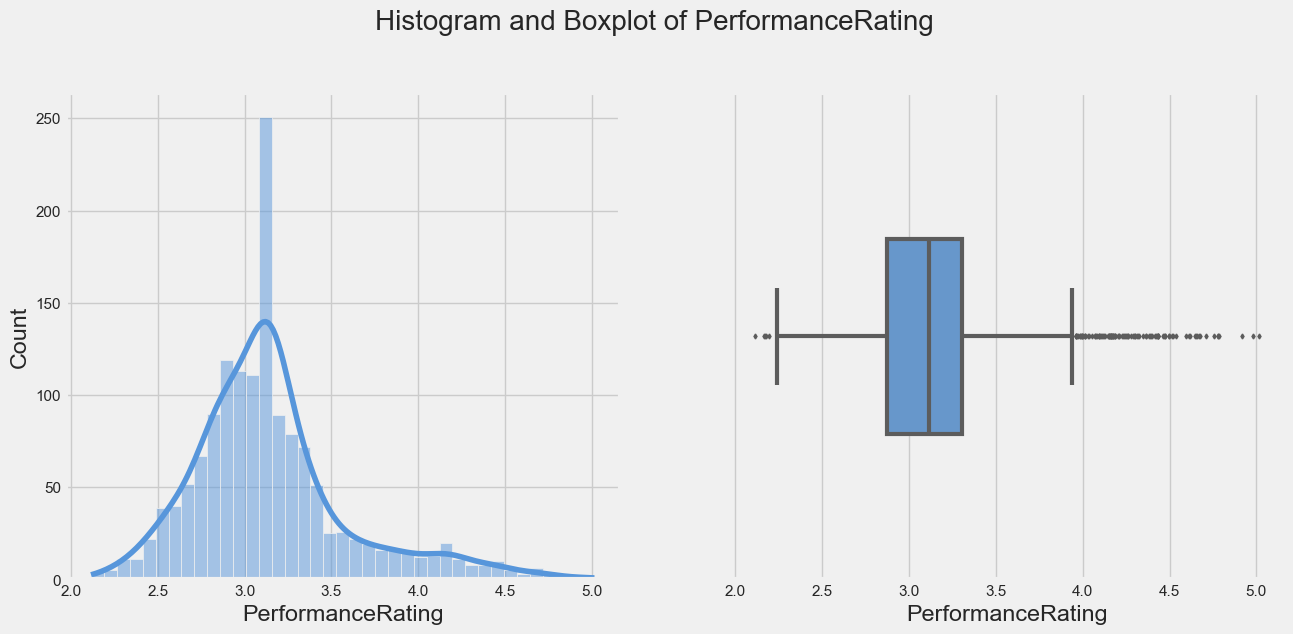

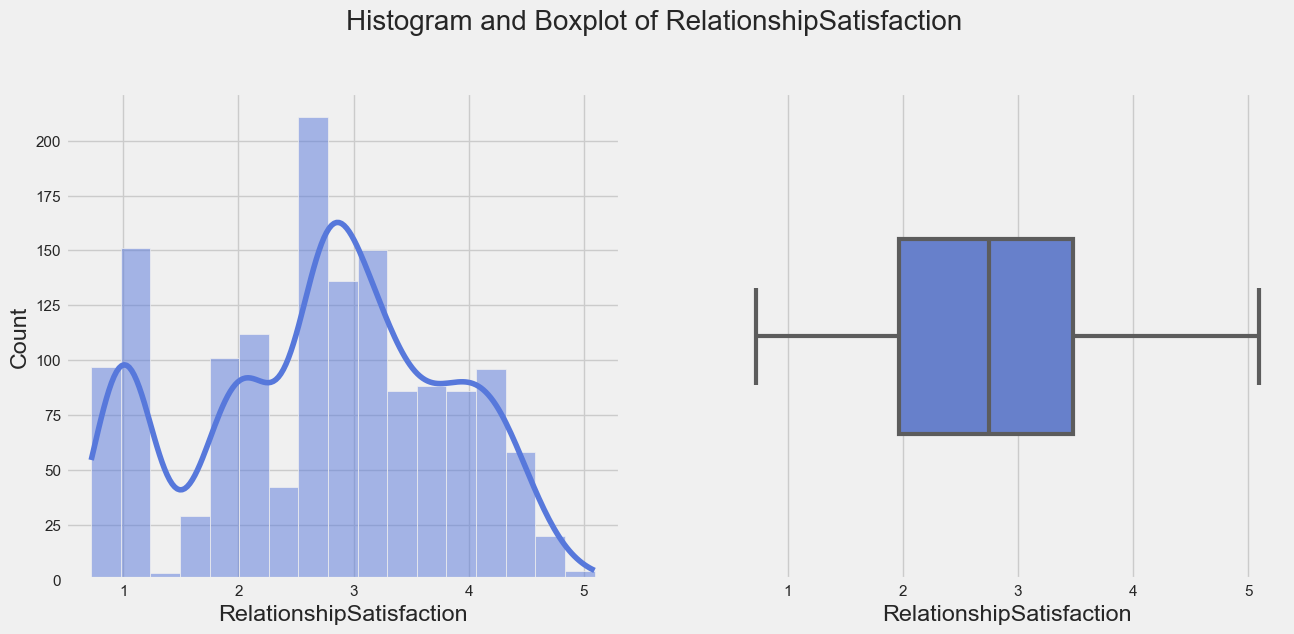

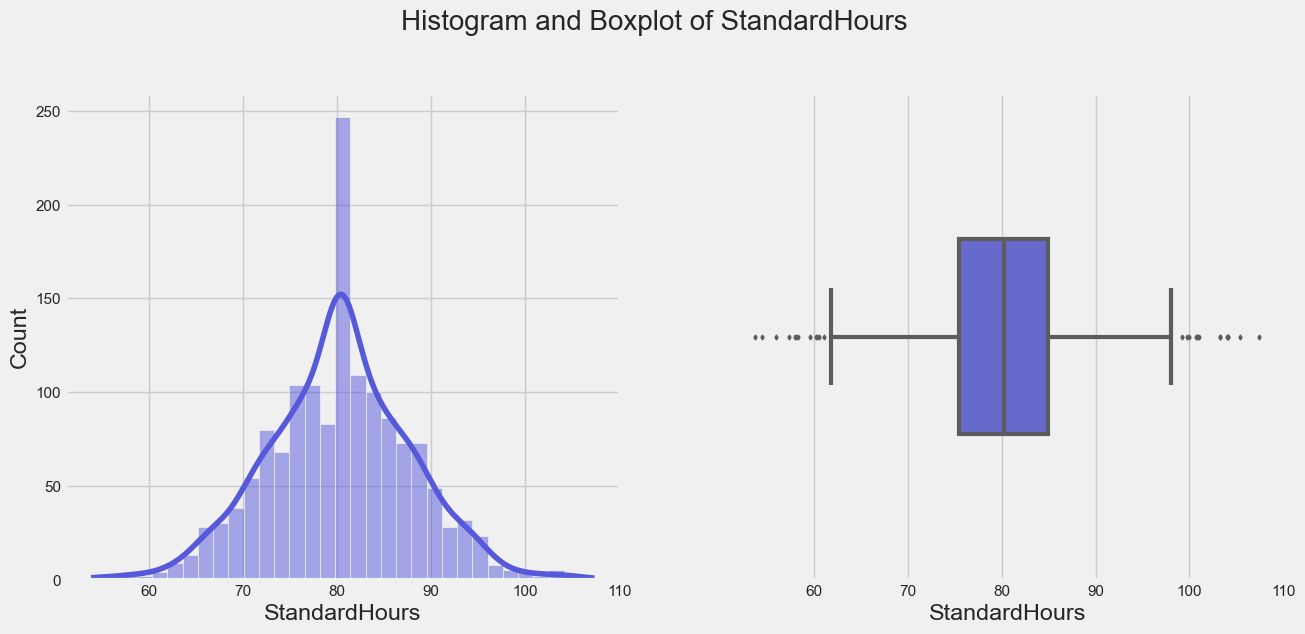

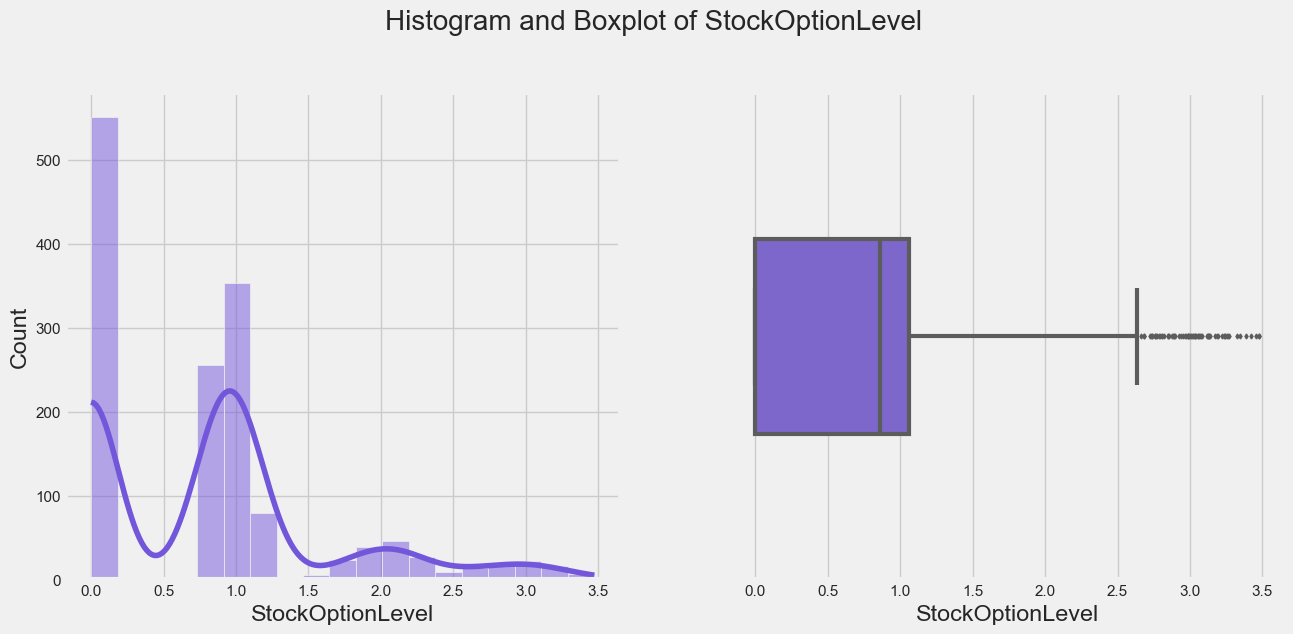

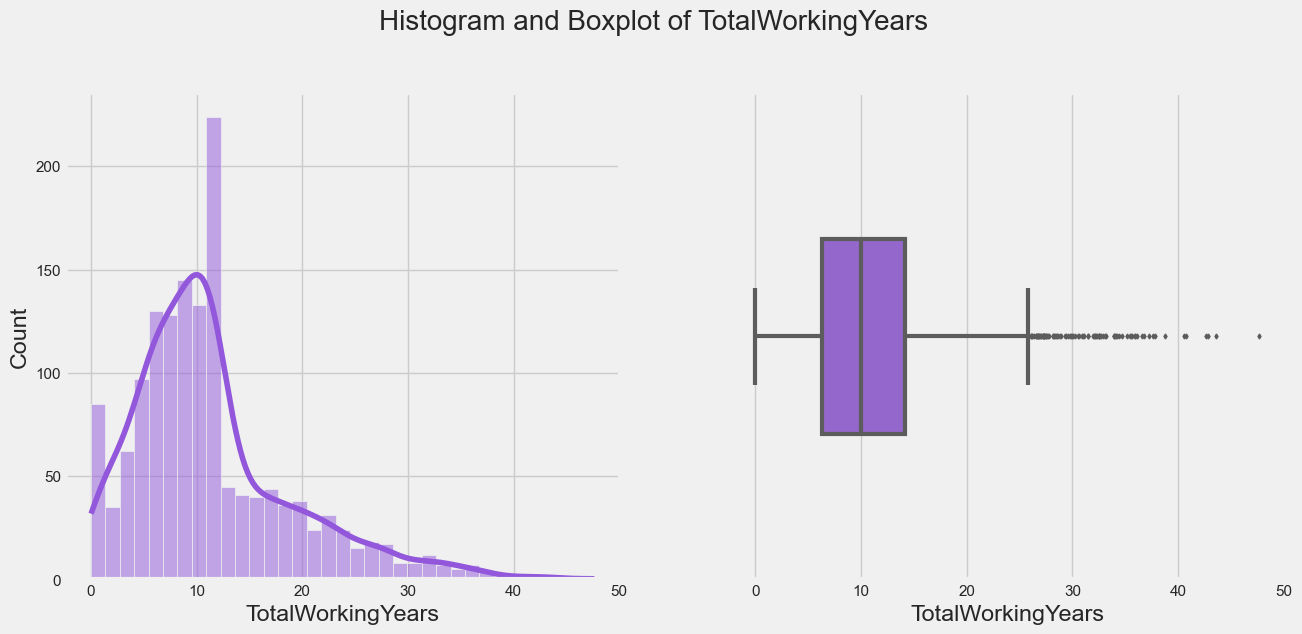

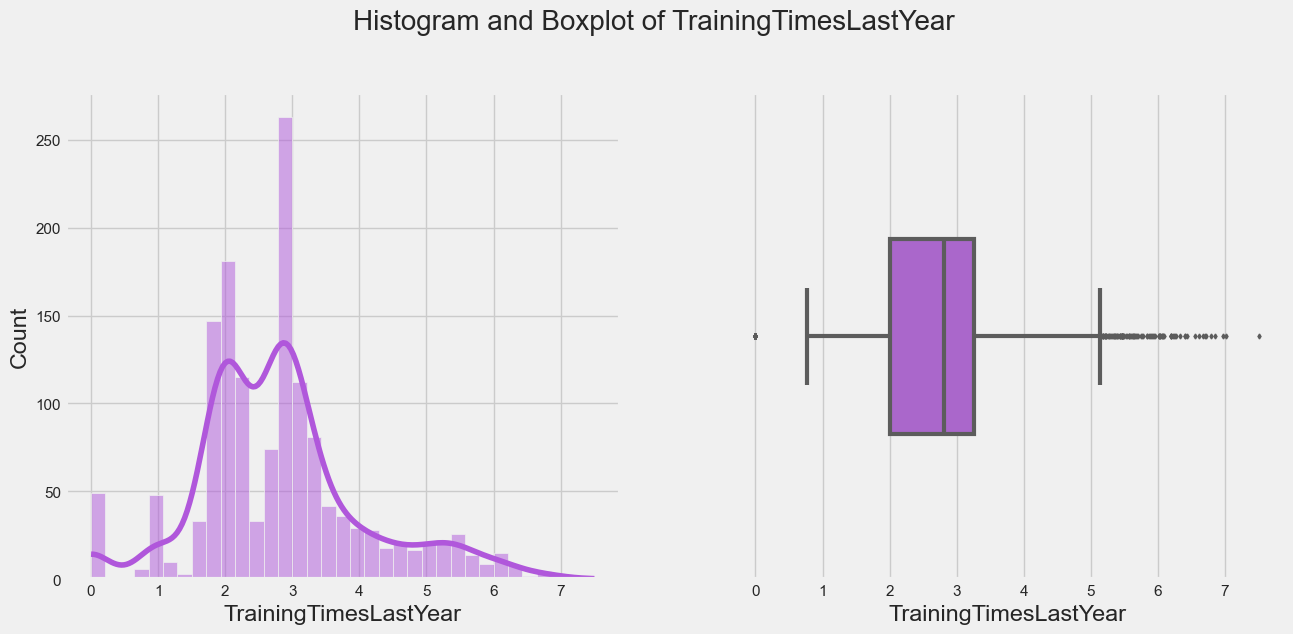

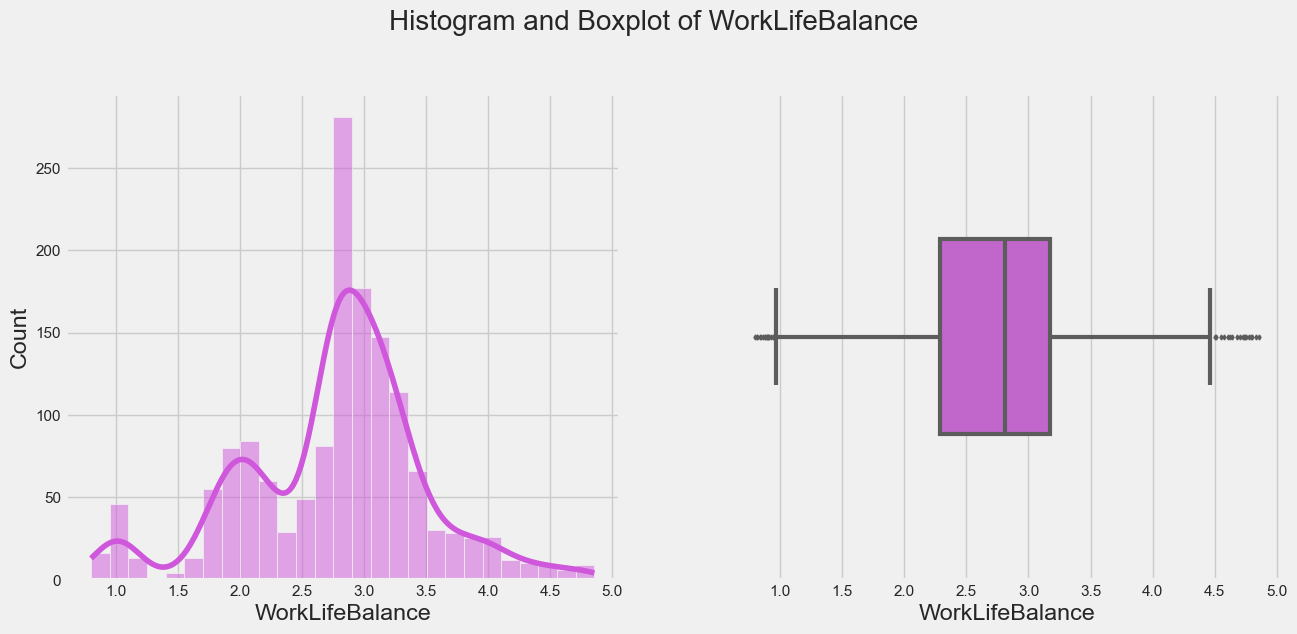

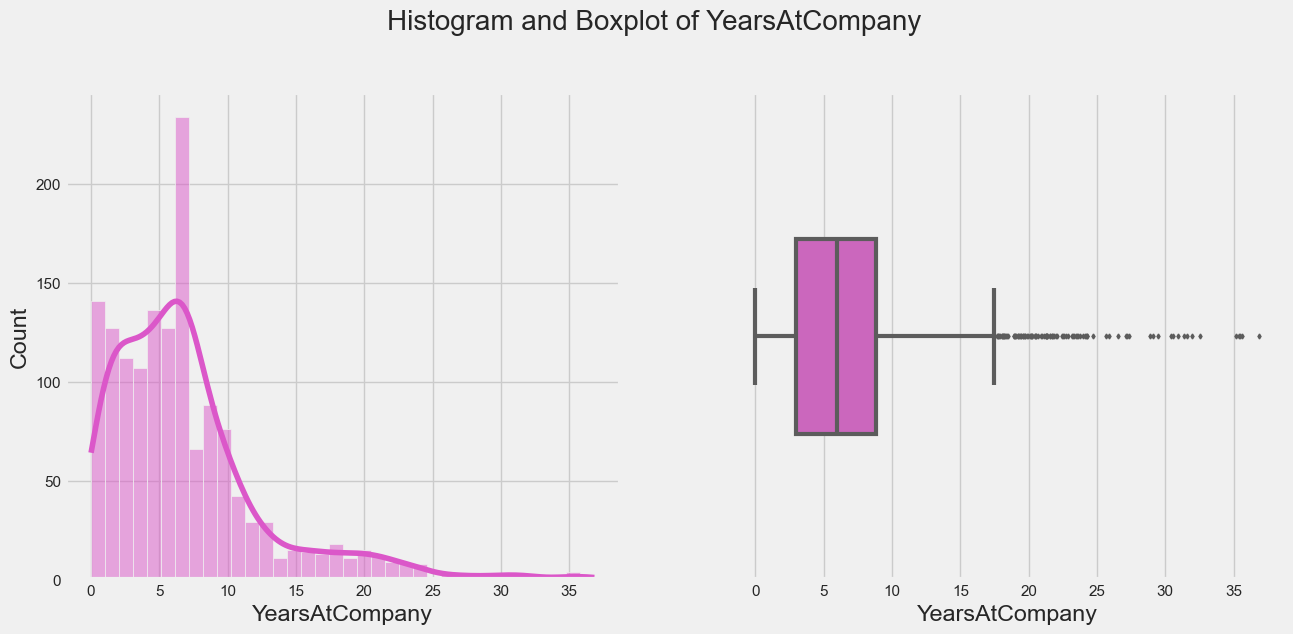

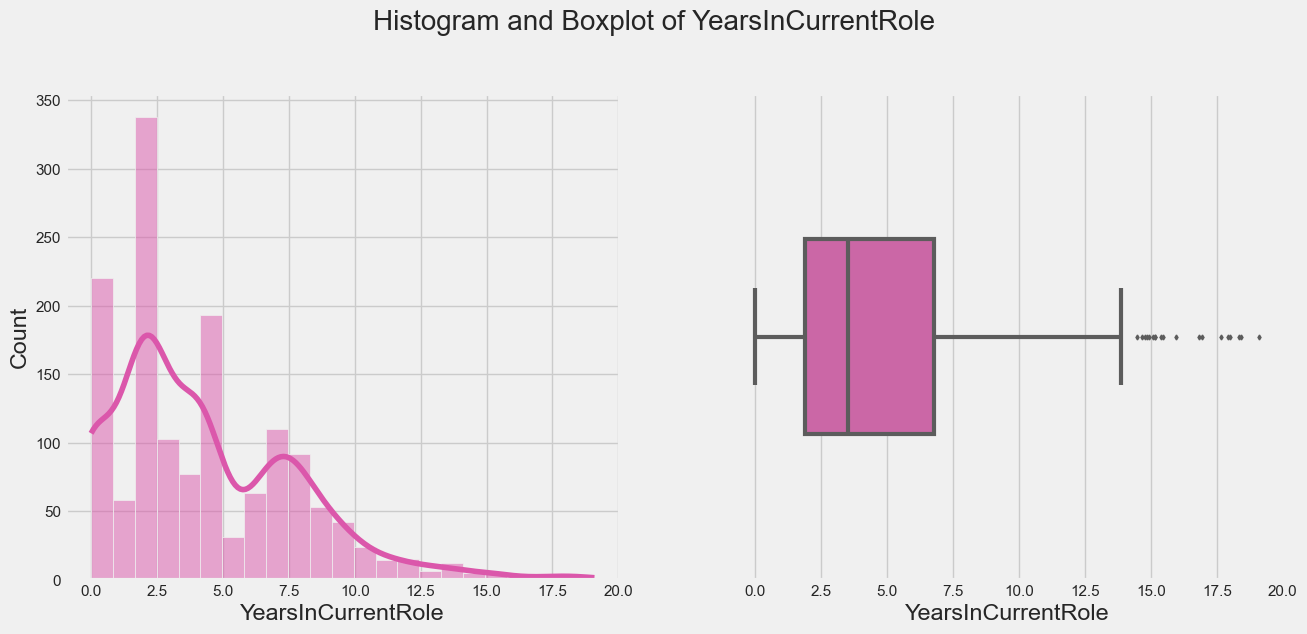

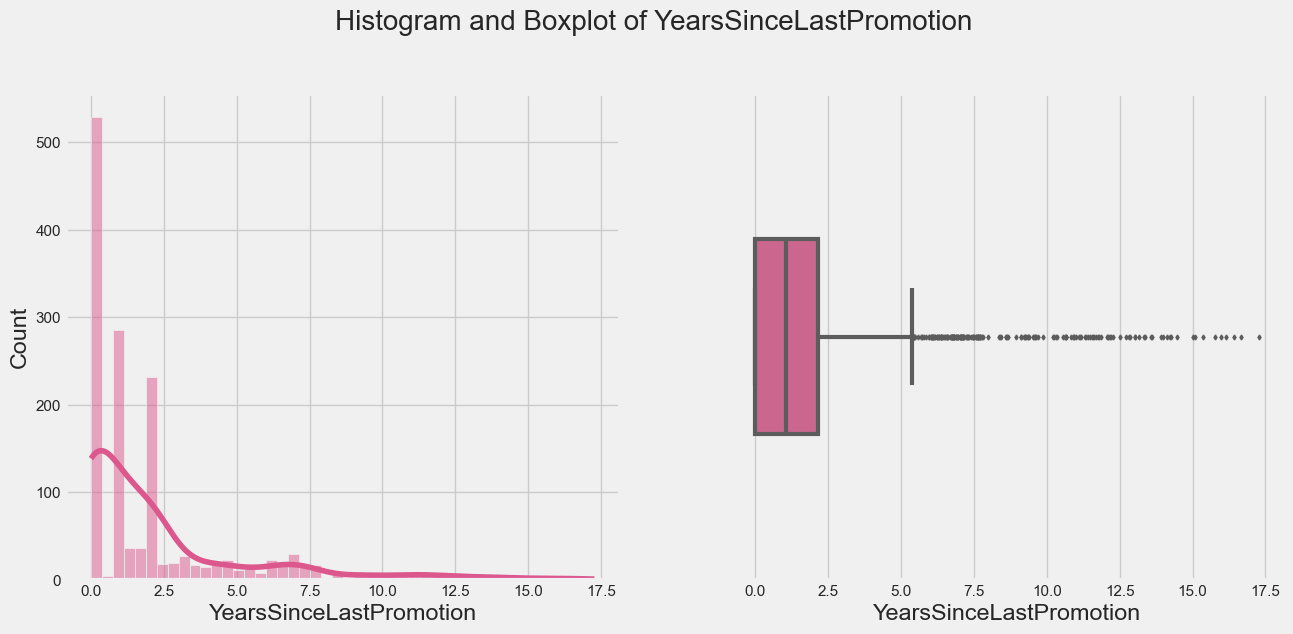

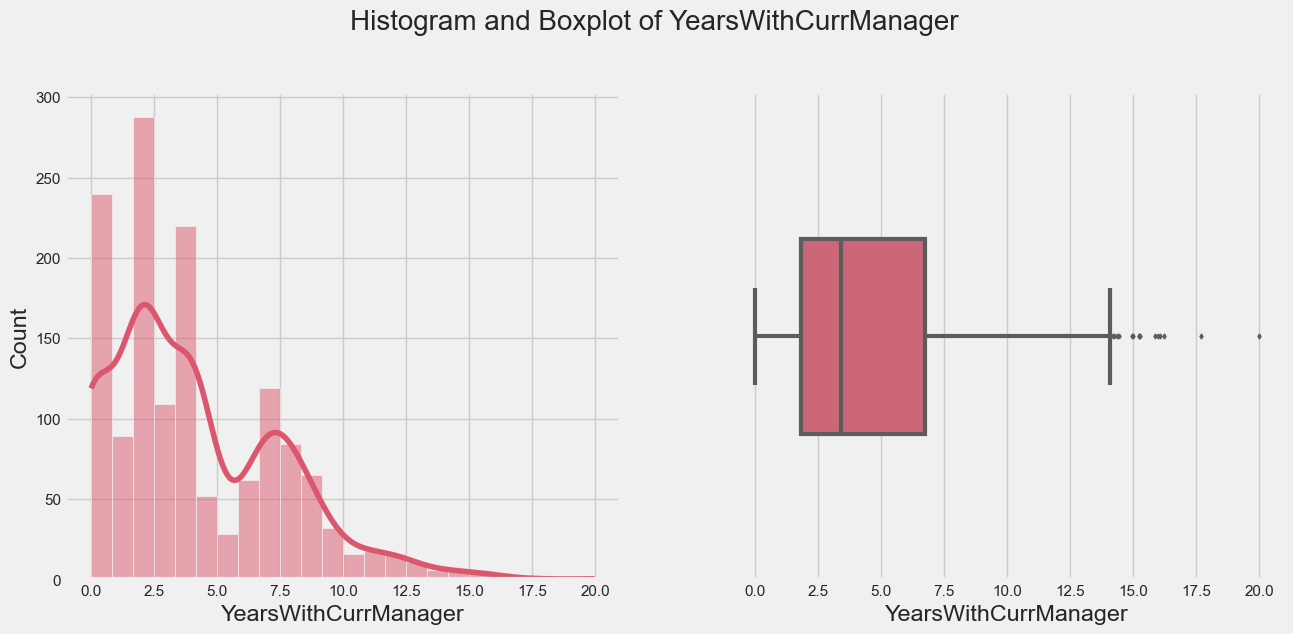

In [20]:
#from fasteda import fast_eda
#fast_eda(numeric_df)

here important is correlations, we are checking outliers, we need to check the relationship btw the atritions, life ballance

Notes for correlations report:  more
monthly income
job level
total working years//
less
years at company
years current role
years since last promo
years with current manager//

attition is dependent on the above indepent values...

below checking correlations

C:\Users\zerokool5\AppData\Local\Temp\ipykernel_8696\1345114745.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'],alpha = 0.5, shade = True)


<Axes: xlabel='Age', ylabel='Density'>

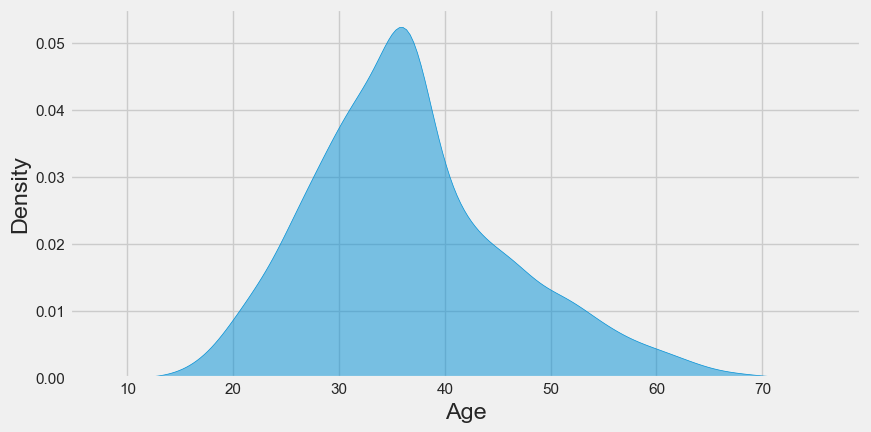

In [21]:
fig = plt.figure(figsize=(20,10))
plt.subplot(221)
sns.set_style('white')
sns.kdeplot(df['Age'],alpha = 0.5, shade = True)

C:\Users\zerokool5\AppData\Local\Temp\ipykernel_8696\4086565415.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['MonthlyIncome'],alpha = 0.5, shade = True)


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

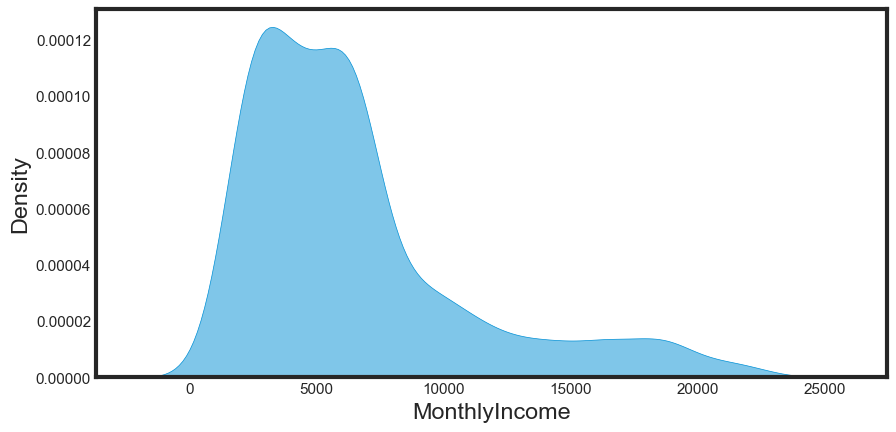

In [22]:
fig = plt.figure(figsize=(20,10))
plt.subplot(221)
sns.set_style('white')
sns.kdeplot(df['MonthlyIncome'],alpha = 0.5, shade = True)


In [23]:
df['DistanceFromHome']

0        1.016716
1        9.091097
2        2.198662
3        2.937851
4        1.988953
          ...    
1465    21.647903
1466     6.027683
1467     9.091097
1468     2.094496
1469     7.231661
Name: DistanceFromHome, Length: 1470, dtype: float64

<Axes: ylabel='count'>

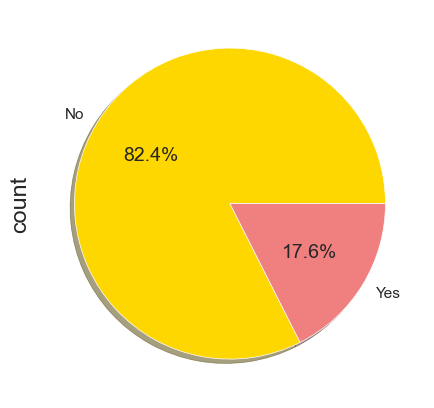

In [24]:
cols = ['gold', 'lightcoral']
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

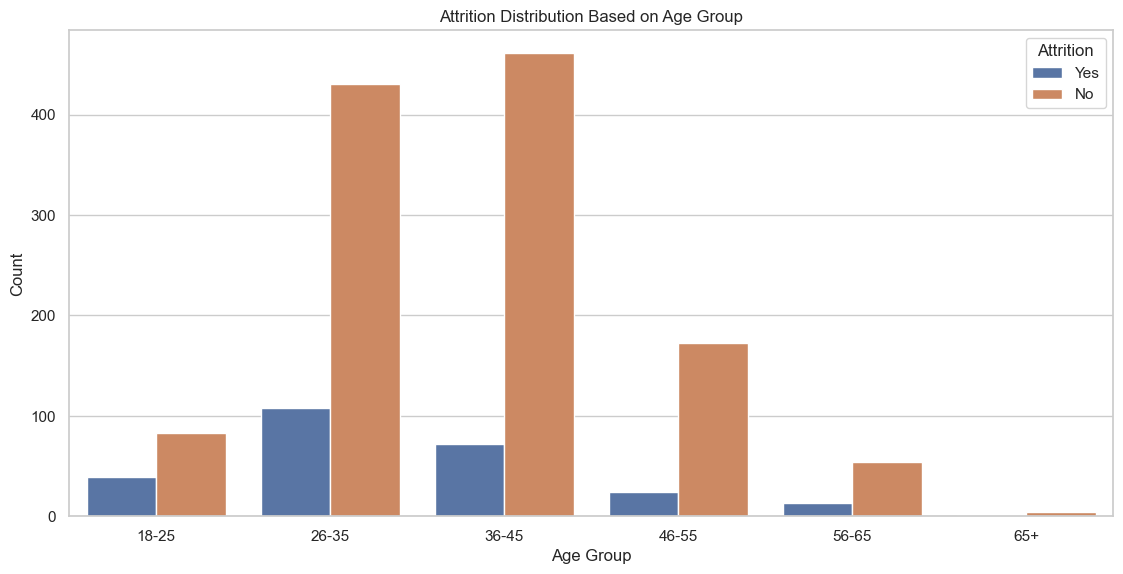

In [25]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]  # You can adjust these bins as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a bar plot to visualize attrition distribution based on age group
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='Attrition', data=df, order=labels)
plt.title('Attrition Distribution Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

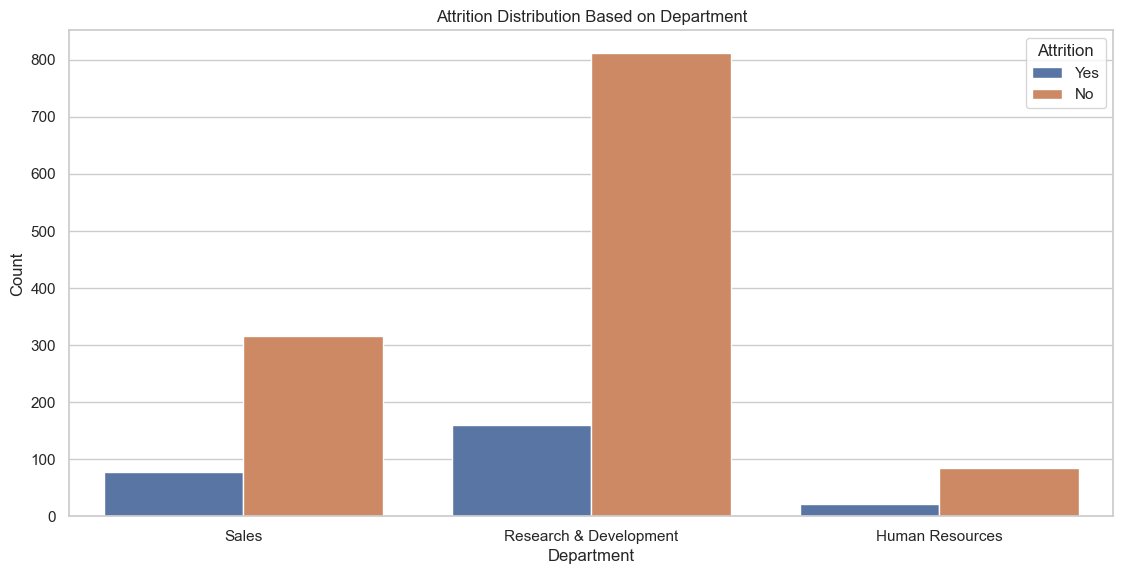

In [26]:
sns.set(style="whitegrid")

# Create a bar plot to visualize attrition distribution based on department
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition Distribution Based on Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

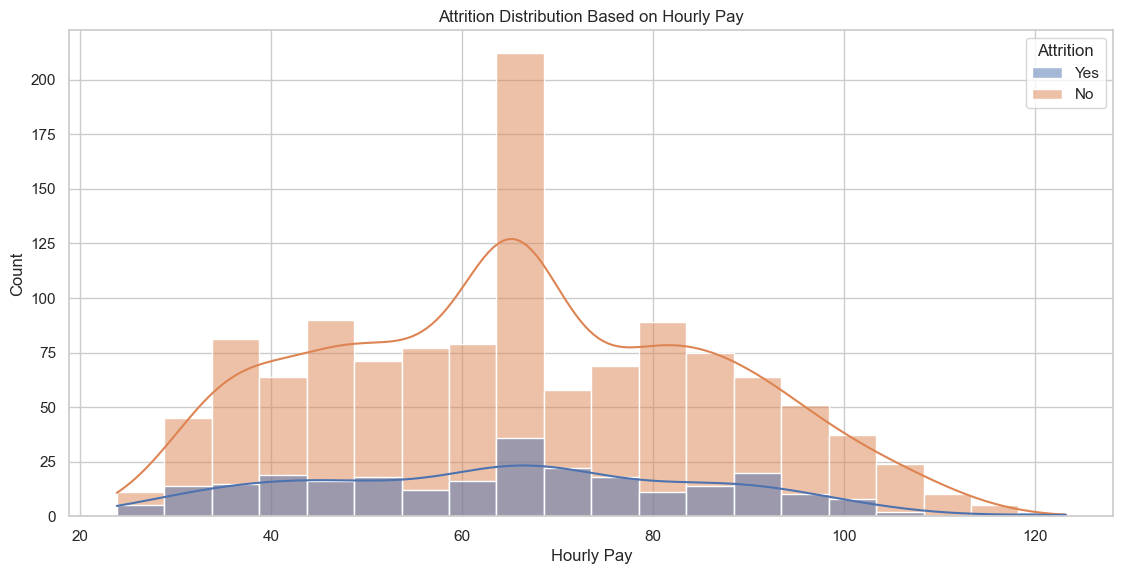

In [27]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Create a histogram to visualize attrition distribution based on hourly pay
plt.figure(figsize=(12, 6))
sns.histplot(x='HourlyRate', hue='Attrition', data=df, bins=20, kde=True)
plt.title('Attrition Distribution Based on Hourly Pay')
plt.xlabel('Hourly Pay')
plt.ylabel('Count')
plt.show()

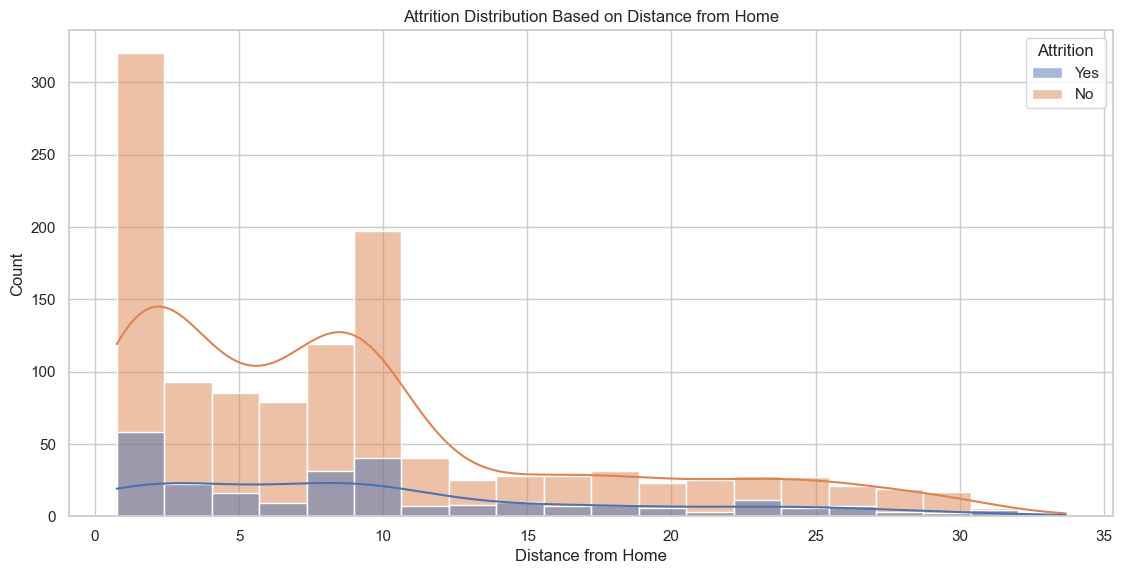

In [28]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Create a histogram to visualize attrition distribution based on distance from home
plt.figure(figsize=(12, 6))
sns.histplot(x='DistanceFromHome', hue='Attrition', data=df, bins=20, kde=True)
plt.title('Attrition Distribution Based on Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Count')
plt.show()

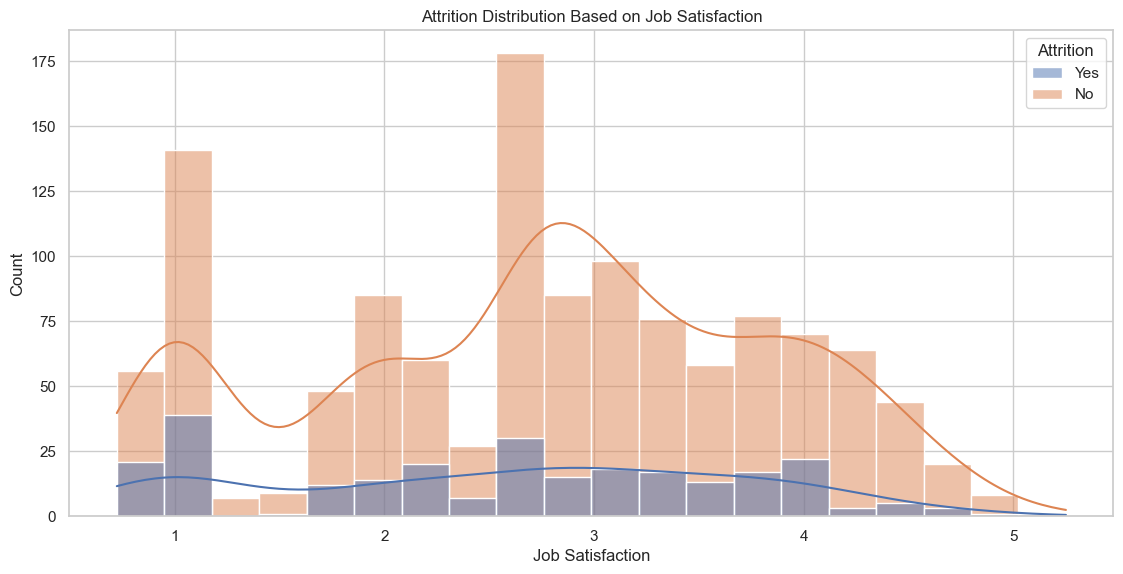

In [29]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Create a histogram to visualize attrition distribution based on distance from home
plt.figure(figsize=(12, 6))
sns.histplot(x='JobSatisfaction', hue='Attrition', data=df, bins=20, kde=True)
plt.title('Attrition Distribution Based on Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

C:\Users\zerokool5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


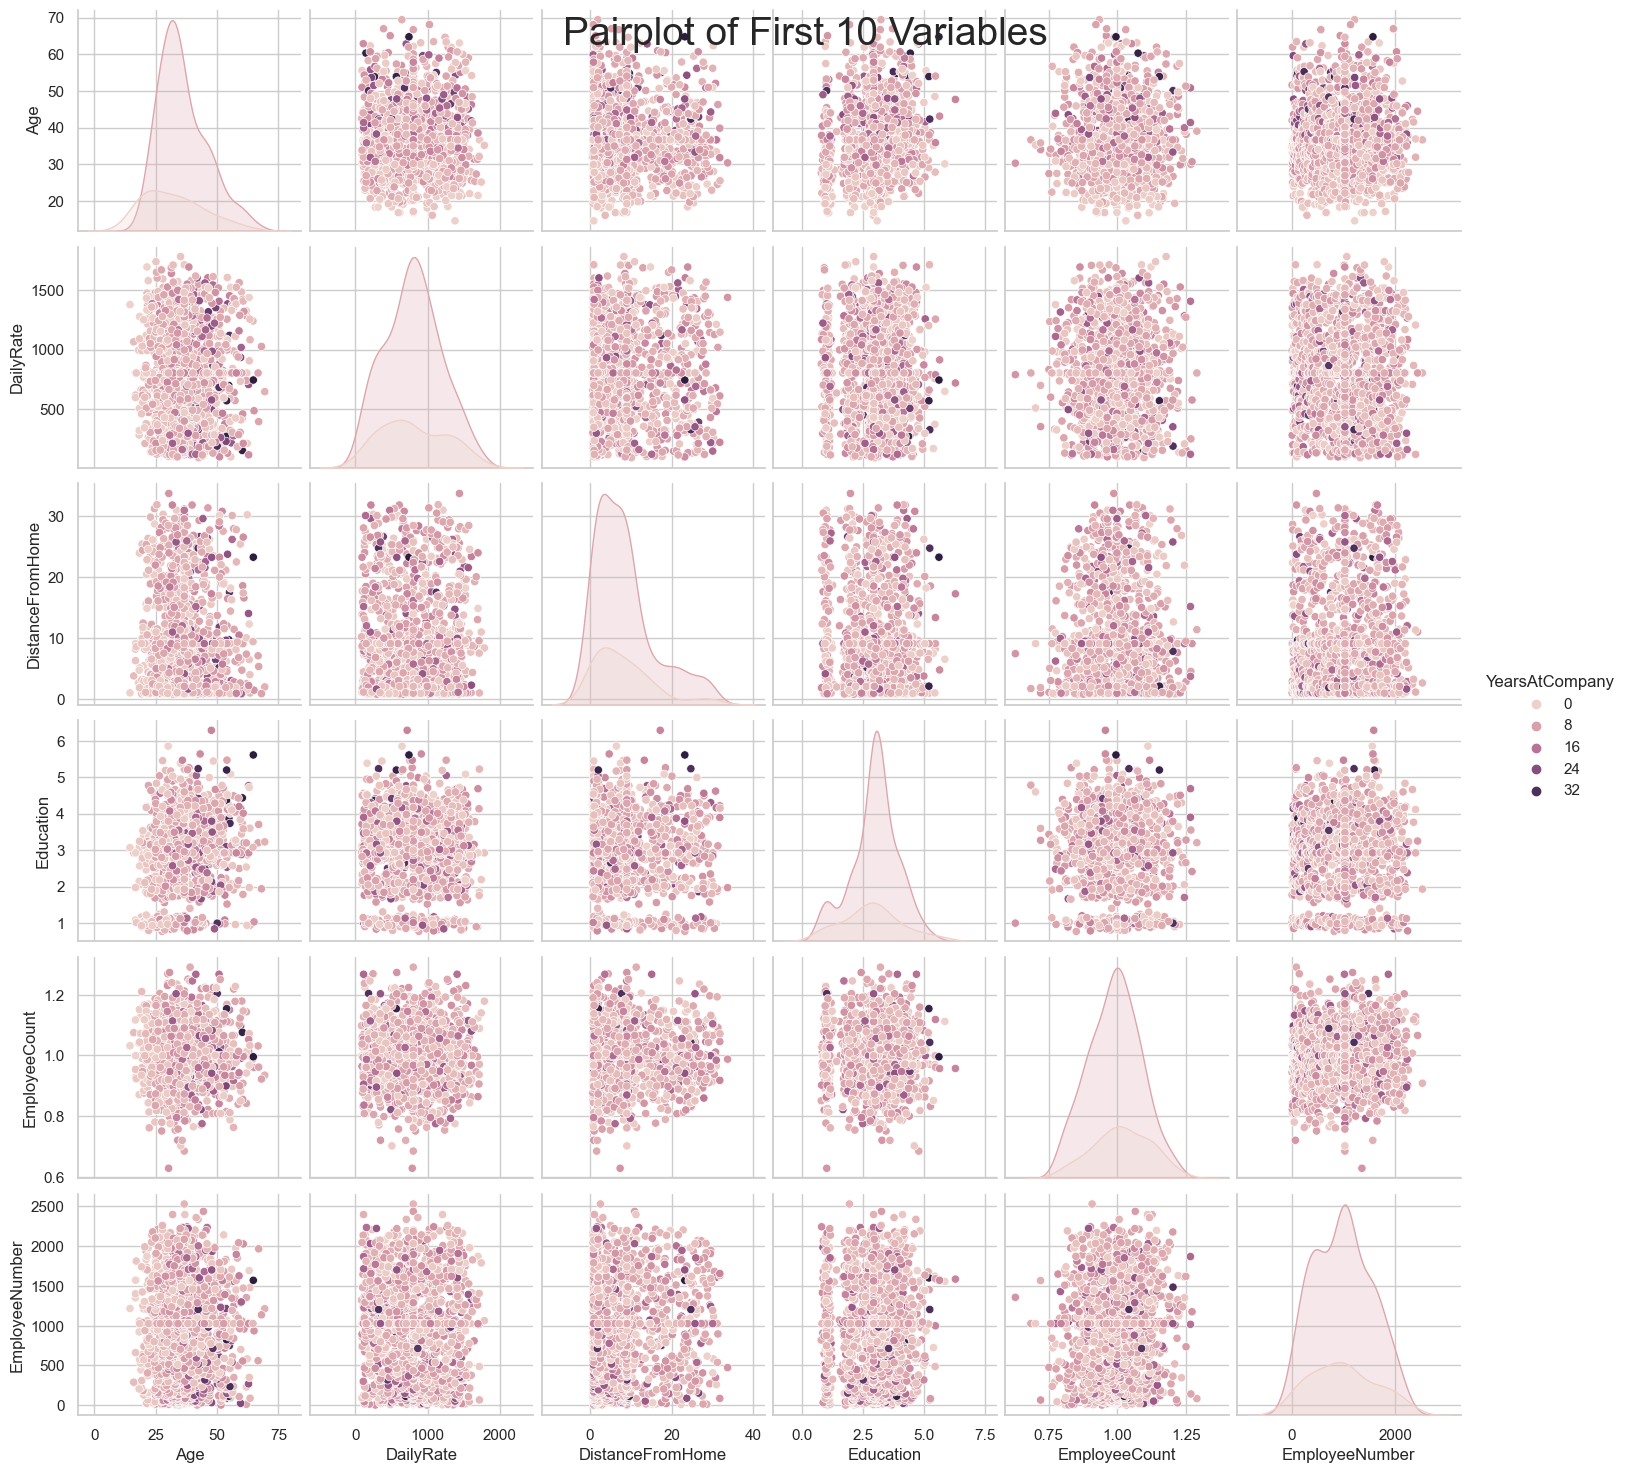

In [30]:
variables = df.iloc[:, :10]
variables["YearsAtCompany"] = df["YearsAtCompany"]
sns.pairplot(variables, hue = "YearsAtCompany")
plt.suptitle("Pairplot of First 10 Variables", fontsize = 28)
plt.show()

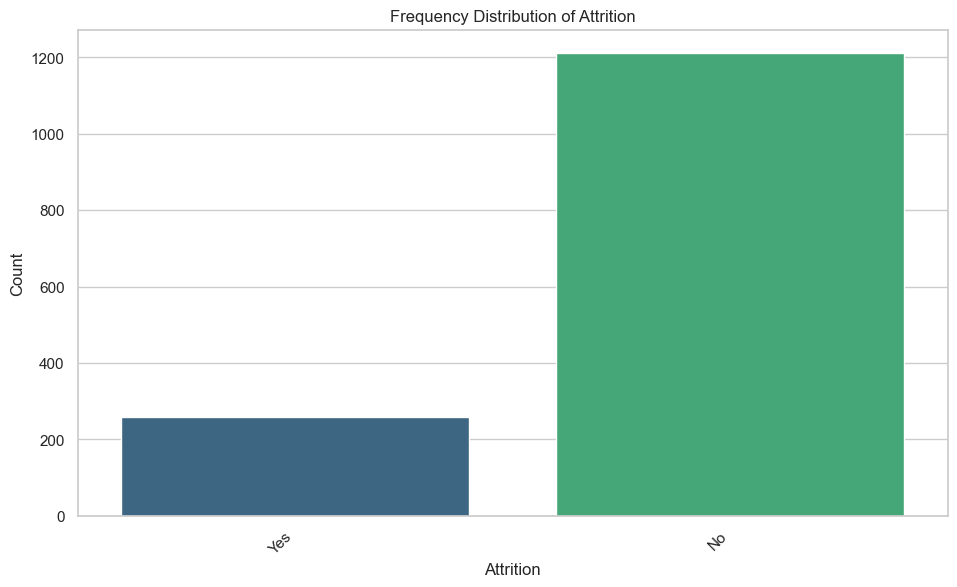

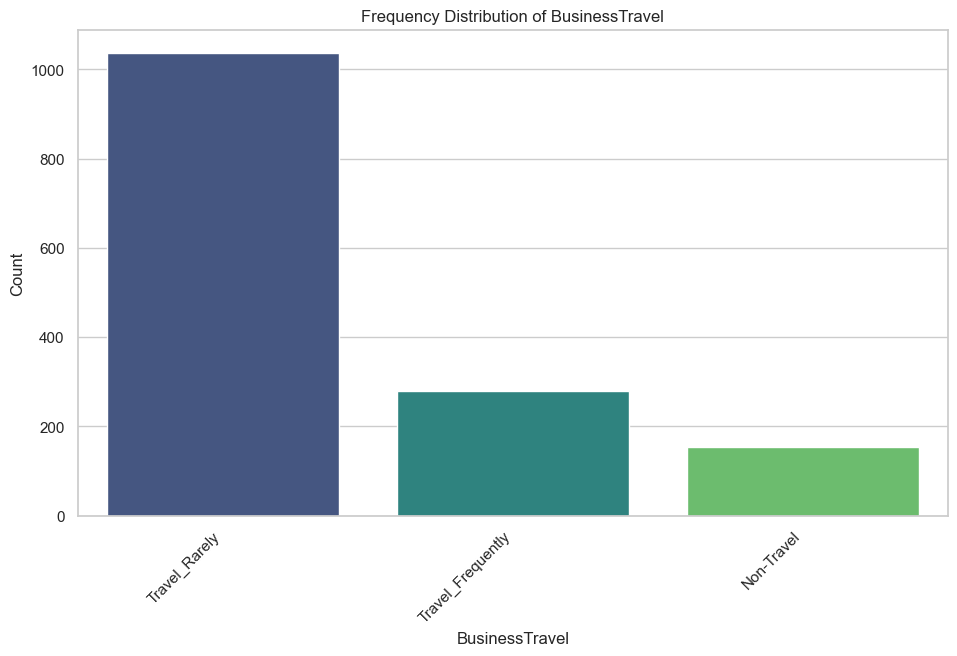

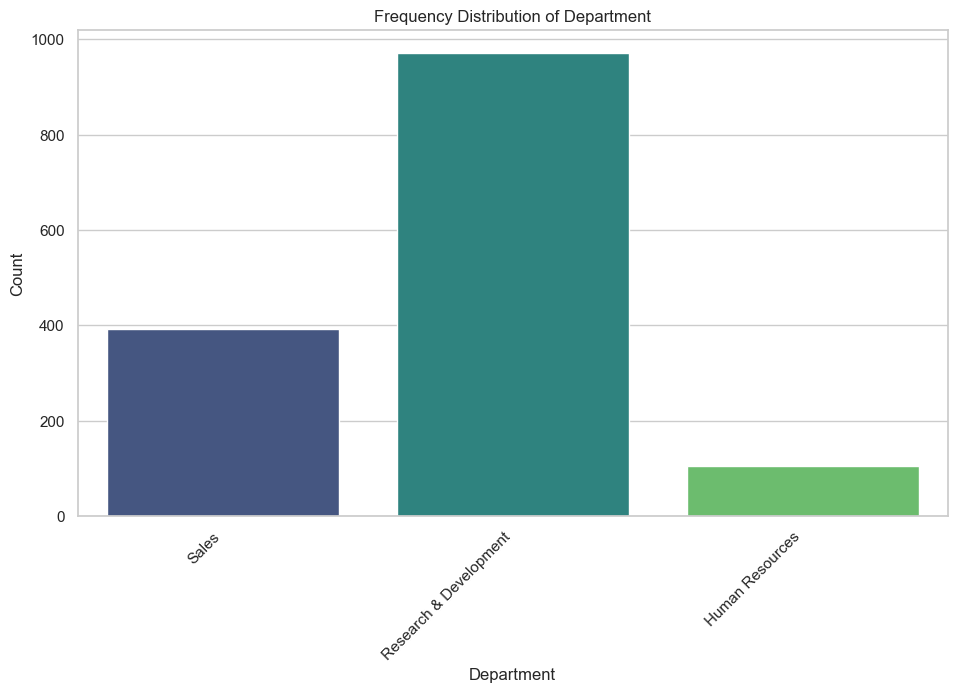

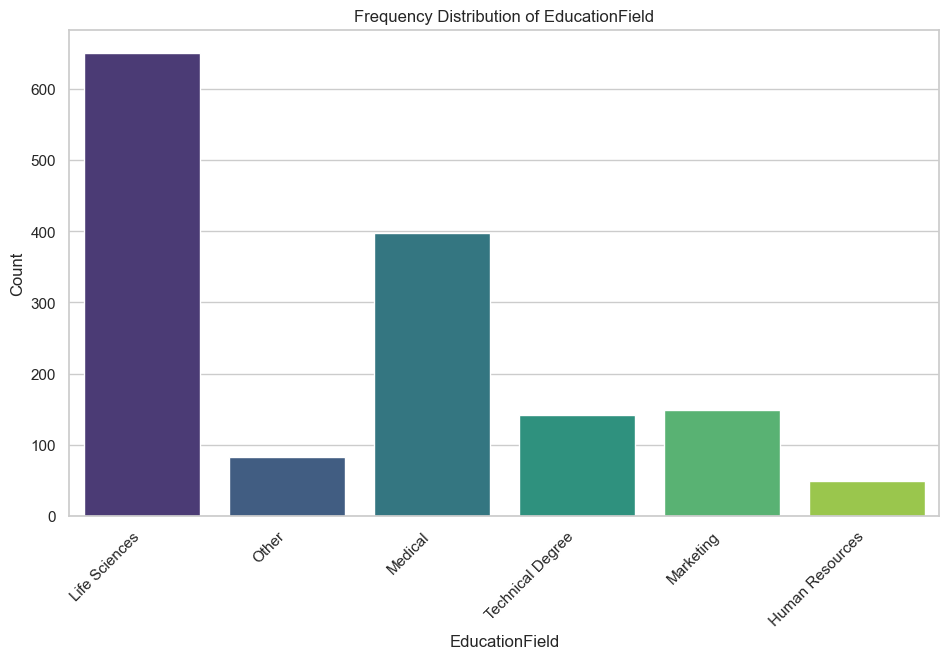

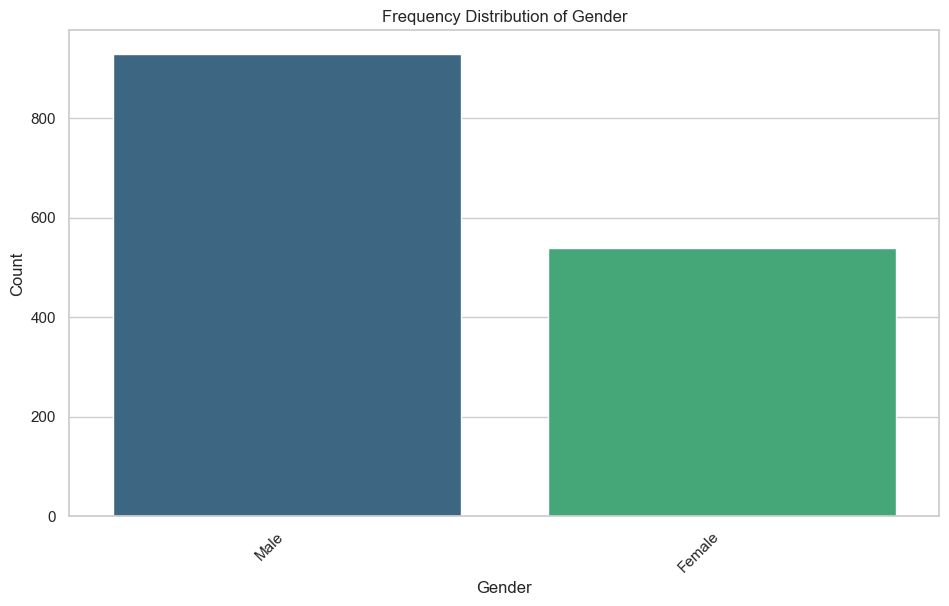

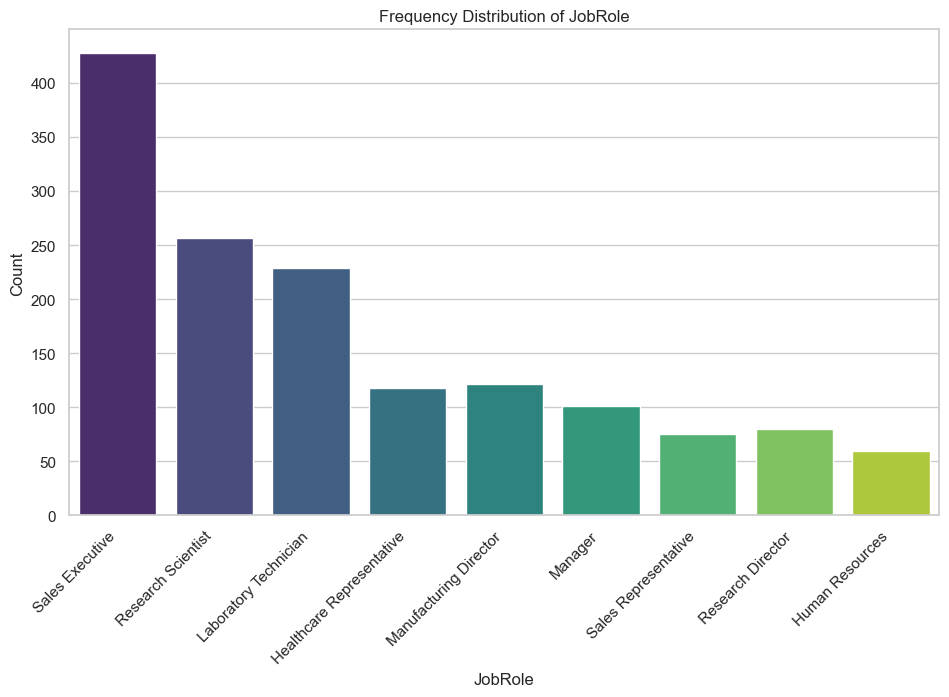

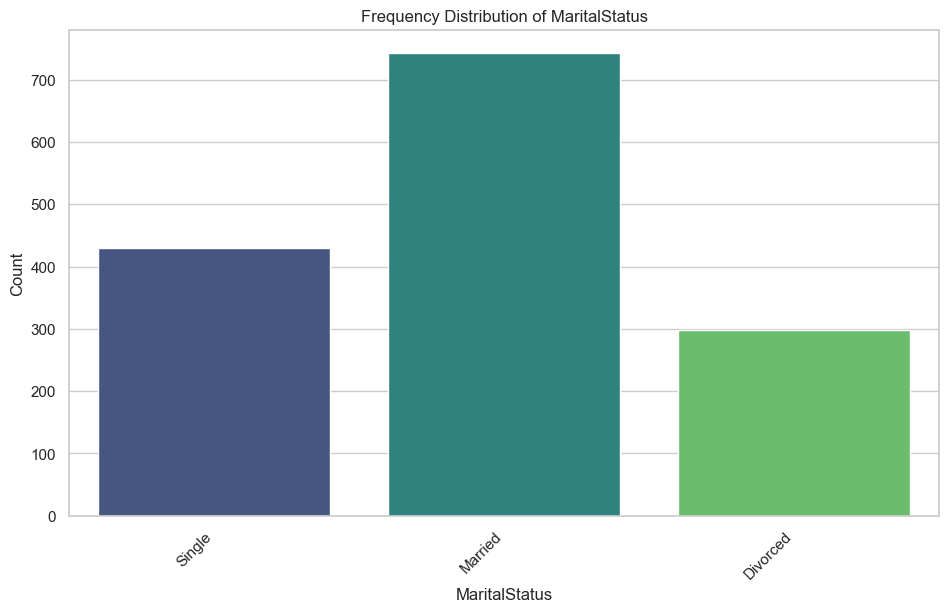

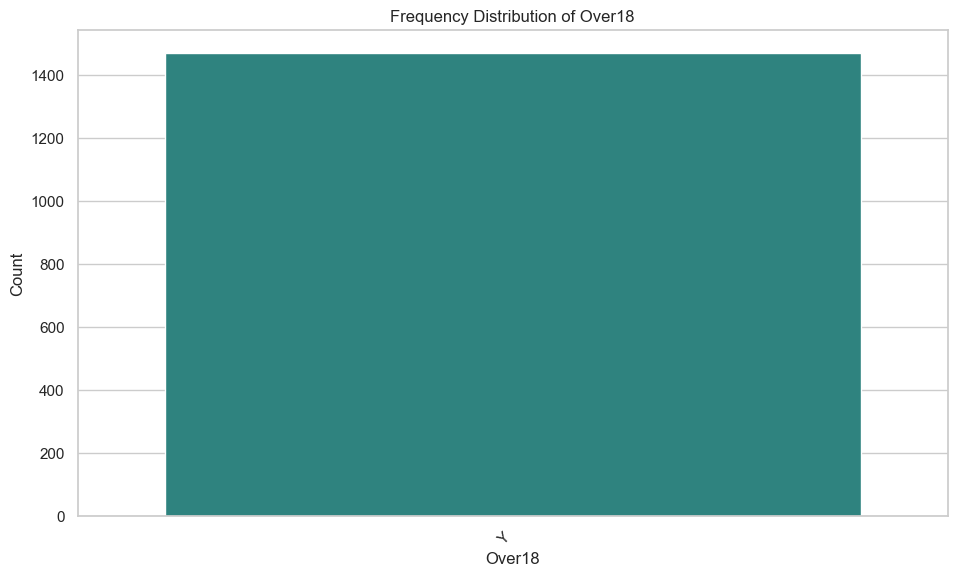

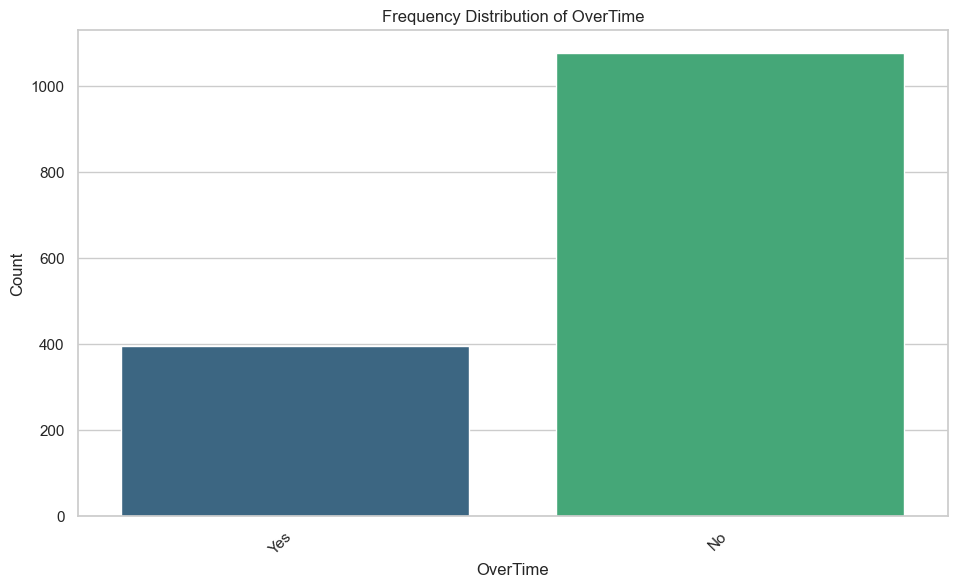

In [31]:
# Frequency distribution of categorical variables
categorical_cols = df.select_dtypes(include='object').columns

# Create bar plots for each categorical variable
for column in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df, palette="viridis")
    plt.title(f"Frequency Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.show()

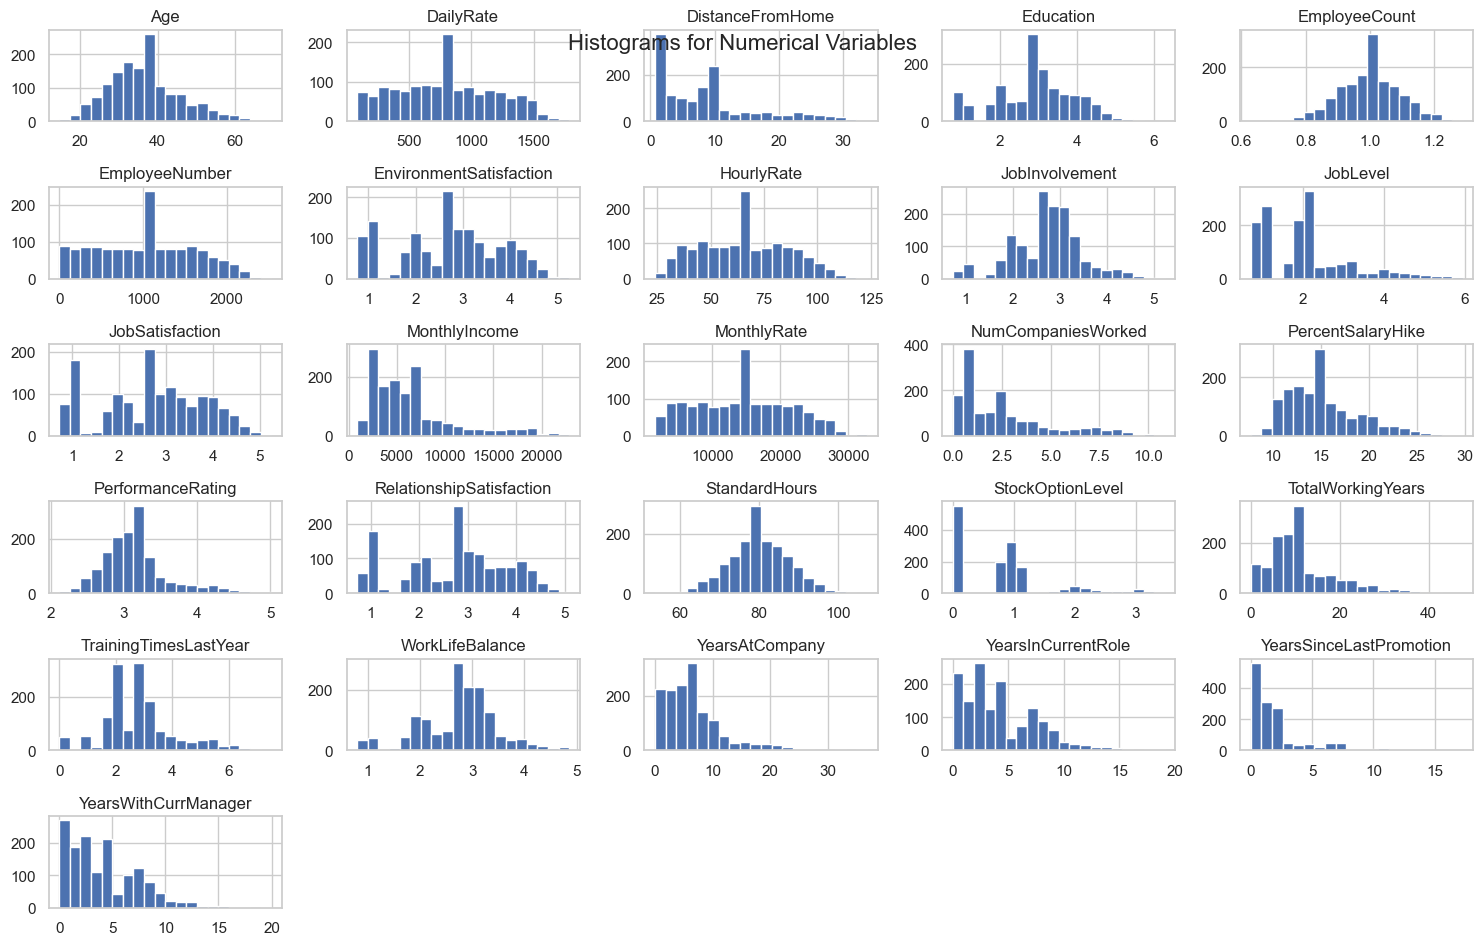

In [32]:
# Histograms for numerical variables
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms for Numerical Variables", y=0.92, fontsize=16)
plt.tight_layout()  # Add one-line space
plt.show()

In [33]:
# Calculate mean, median, and mode
central_tendency = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Mode': df[numerical_cols].mode().iloc[0]  # Mode can have multiple values, so we take the first one
})

# Display the central tendency measures
print("\nMeasures of Central Tendency:")
print(central_tendency)


Measures of Central Tendency:
                                  Mean        Median          Mode
Age                          36.635268     36.262348     36.635268
DailyRate                   802.030050    802.030050    802.030050
DistanceFromHome              9.091097      7.871631      9.091097
Education                     2.923447      2.923447      2.923447
EmployeeCount                 0.999325      0.999325      0.999325
EmployeeNumber             1026.679166   1026.679166   1026.679166
EnvironmentSatisfaction       2.726443      2.726443      2.726443
HourlyRate                   65.647722     65.647722     65.647722
JobInvolvement                2.743028      2.779384      2.743028
JobLevel                      2.058270      1.999218      2.058270
JobSatisfaction               2.715272      2.730414      2.715272
MonthlyIncome              6544.718401   5495.905413   6544.718401
MonthlyRate               14364.334764  14364.334764  14364.334764
NumCompaniesWorked            2

In [34]:
from scipy.stats import ttest_ind

# Filter data for employees who left and stayed
attrition_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no = df[df['Attrition'] == 'No']['MonthlyIncome']

# Perform independent t-test
t_statistic, p_value = ttest_ind(attrition_yes, attrition_no, equal_var=False)

# Set the significance level
alpha = 0.05

# Print the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Compare p-value to the significance level
if p_value < alpha:
    print("The difference in Monthly Income is statistically significant.")
else:
    print("There is no statistically significant difference in Monthly Income.")

T-Statistic: -5.749031933954312
P-Value: 1.680924531936329e-08
The difference in Monthly Income is statistically significant.


#### Result suggests that there is evidence to support the idea that Monthly Income plays a role in employee attrition.

In [35]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
result = f_oneway(df['MonthlyIncome'][df['Department'] == 'Sales'],
                  df['MonthlyIncome'][df['Department'] == 'Research & Development'],
                  df['MonthlyIncome'][df['Department'] == 'Human Resources'])

# Print the results
print(f'F-Statistic: {result.statistic}')
print(f'P-Value: {result.pvalue}')


alpha = 0.05

# Compare p-value to the significance level
if result.pvalue < alpha:
    print("There is a significant difference in Monthly Income among departments.")
else:
    print("There is no significant difference in Monthly Income among departments.")

F-Statistic: 2.9708821555778218
P-Value: 0.05156655909892281
There is no significant difference in Monthly Income among departments.


In [36]:
# Perform one-way ANOVA
result = f_oneway(df['MonthlyIncome'][df['Attrition'] == 'Yes'],
                  df['MonthlyIncome'][df['Attrition'] == 'No'])

# Print the results
print(f'F-Statistic: {result.statistic}')
print(f'P-Value: {result.pvalue}')

# Set the significance level
alpha = 0.05

# Compare p-value to the significance level
if result.pvalue < alpha:
    print("There is a significant difference in Monthly Income between employees who left and those who stayed.")
else:
    print("There is no significant difference in Monthly Income between employees who left and those who stayed.")

F-Statistic: 25.300853351486438
P-Value: 5.509264875987317e-07
There is a significant difference in Monthly Income between employees who left and those who stayed.


In [37]:
df.groupby("Attrition")['MonthlyIncome'].mean().sort_values()

Attrition
Yes    5269.456415
No     6816.185061
Name: MonthlyIncome, dtype: float64

In [38]:
df.groupby("Attrition")['DistanceFromHome'].mean().sort_values()

Attrition
No     8.926633
Yes    9.863696
Name: DistanceFromHome, dtype: float64

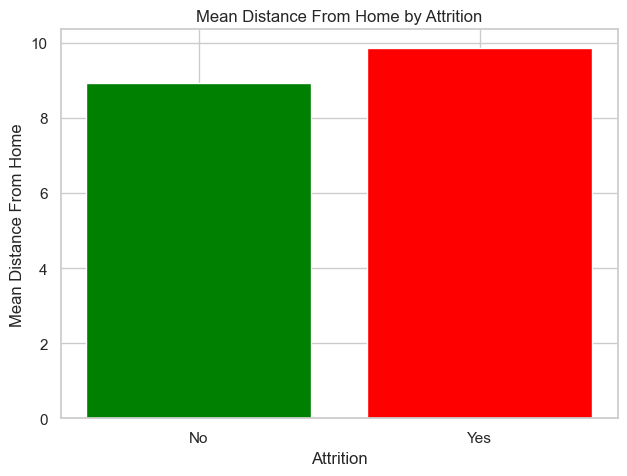

In [39]:
grouped_data = df.groupby("Attrition")['DistanceFromHome'].mean().sort_values()

plt.bar(grouped_data.index, grouped_data.values, color=['green', 'red'])
plt.title('Mean Distance From Home by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Mean Distance From Home')
plt.show()

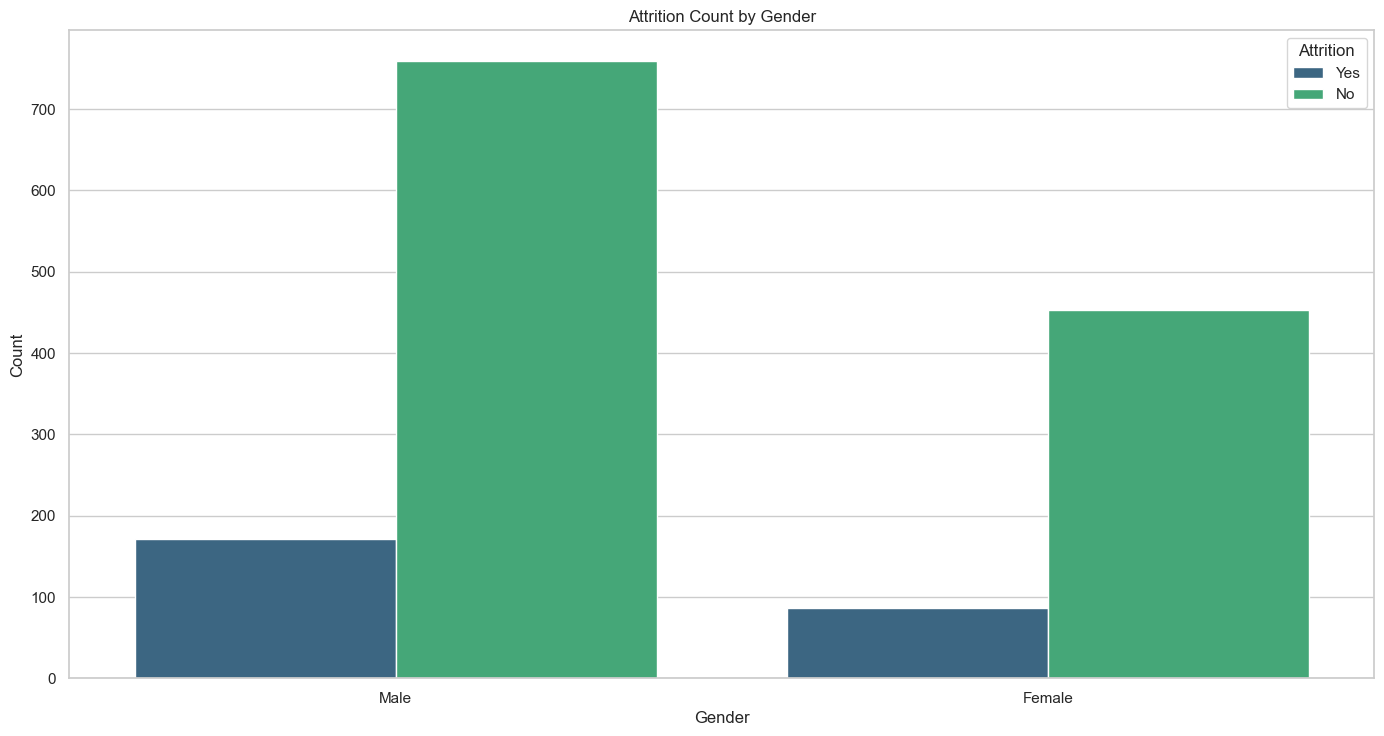

In [40]:
import seaborn as sns
plt.subplots(figsize=(15, 8))
ax = sns.countplot(x="Gender", hue="Attrition", data=df, palette="viridis",capsize = .05)

# Adding labels and title
plt.title('Attrition Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

C:\Users\zerokool5\AppData\Local\Temp\ipykernel_8696\1958206659.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(numeric_df.corr(), dtype=np.bool)


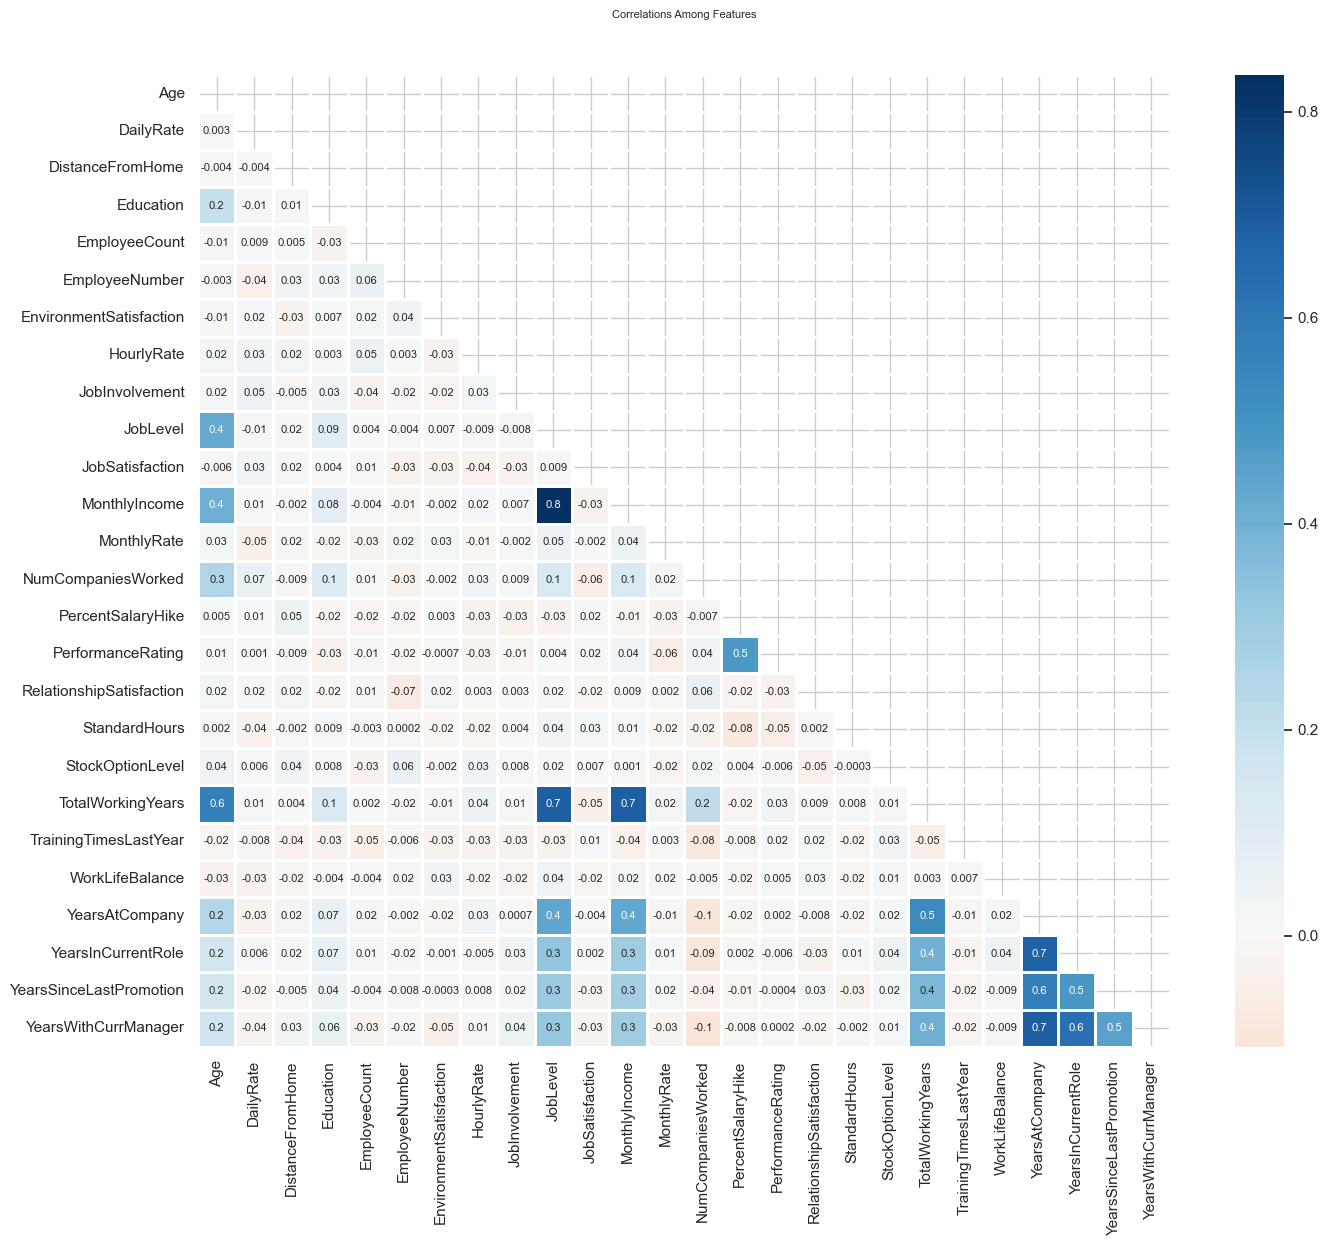

In [41]:
## heatmeap to see the correlation between features.
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(numeric_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(numeric_df.corr(),
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9,
            linecolor='white',
            fmt='.1g',
            center = 0,
            square=True,
            annot_kws={'size':8})
plt.title("Correlations Among Features", y = 1.03,fontsize = 8, pad = 20);

### Principal Component Analysis


Summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
num = df.select_dtypes(include=['float64','int64'])

In [44]:
scalar =StandardScaler()

In [45]:
numerical_features_standardized=scalar.fit_transform(num)

In [46]:
pca=PCA()
pca_result=pca.fit_transform(numerical_features_standardized)

Text(0, 0.5, 'Cum Explained Varience')

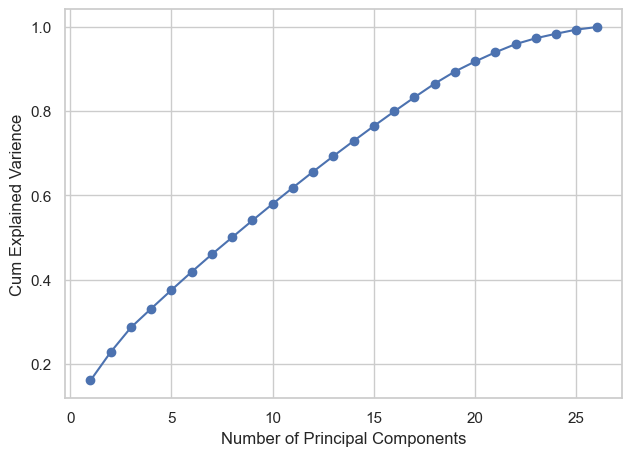

In [47]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cum Explained Varience')

In [48]:
n_components=2

pca=PCA(n_components=n_components)

pca_result=pca.fit_transform(numerical_features_standardized)

pca_df=pd.DataFrame(data=pca_result,columns=[f'PC{i}' for i in range(1,n_components+1)])

result_data=pd.DataFrame(data=pca_result,columns=['PC1','PC2'])

In [49]:
result_data.head()

PC1       PC2
0 -0.095911  1.316447
1  0.519396 -0.674050
2 -2.640988  1.009244
3 -0.982233 -0.536394
4 -1.928353  0.689557

# Machine Learning Model

In [50]:
X = pca_df.values
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

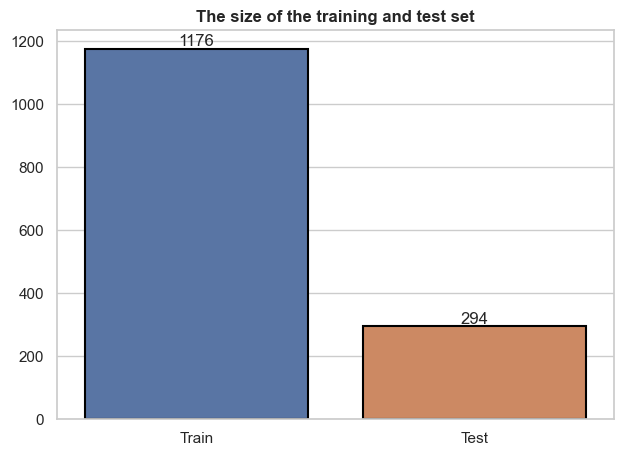

In [51]:
p1 = sns.barplot(x = ['Train', 'Test'],
            y = [y_train.shape[0], y_test.shape[0]],
                linewidth = 1.5,
                edgecolor = 'black')
p1.bar_label(p1.containers[0])

plt.title('The size of the training and test set', fontweight = 'bold')
plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model_k = KNN(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)
print('Accuracy of KNN :', accuracy_score(y_test, y_pred))

Accuracy of KNN : 0.826530612244898


### Linear Discriminant Analysis (LDA)

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Assuming 'Attrition' and 'JobSatisfactionGroup' are columns in your DataFrame
X = df[['Age', 'MonthlyIncome', 'DistanceFromHome']]  # Add more features as needed
y = df['Attrition']

In [55]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)


In [56]:
# Create a DataFrame with the LDA component and the target variable
lda_df = pd.DataFrame(data=X_lda, columns=['LDA_Component'])
lda_df['Attrition'] = df['Attrition']


In [57]:
# Assuming 'Attrition' is the target variable and 'LDA_Component' is the reduced feature from LDA
X = lda_df[['LDA_Component']]
y = lda_df['Attrition']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model_k = KNN(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)
print('Accuracy of KNN :', accuracy_score(y_test, y_pred))

Accuracy of KNN : 0.8163265306122449


In the comparison between Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA), it has been observed that the accuracy achieved through PCA is higher than that of LDA. This outcome can be attributed to the inherent characteristics and goals of each dimensionality reduction technique.



1.  PCA Score - 0.81972
2.  LDA Score - 0.81632

PCA is primarily designed for unsupervised dimensionality reduction, aiming to capture the maximum variance in the data without considering class labels.

LDA is a supervised technique that considers class labels during dimensionality reduction. It aims to find the linear combinations of features that maximize the separation between different classes.

# Hypotheses Testing

In [60]:
!pip install statsmodels

In [61]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

<Axes: title={'center': 'MonthlyIncome'}, xlabel='Attrition'>

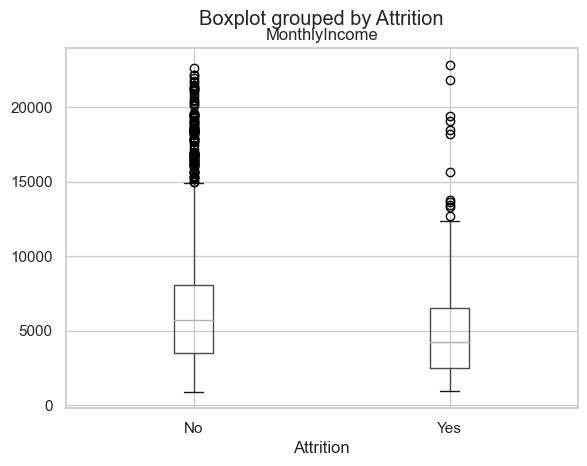

In [62]:
df.boxplot('MonthlyIncome',by='Attrition')

In [63]:
new=ols('MonthlyIncome ~ Attrition ',data=df).fit()
an=sm.stats.anova_lm(new, typ=2)

In [64]:
an

sum_sq      df          F        PR(>F)
Attrition  5.089009e+08     1.0  25.300853  5.509265e-07
Residual   2.952733e+10  1468.0        NaN           NaN

The p-value for 'Attrition' is very low (5.509265e-07), suggesting that there is a significant effect of 'Attrition' on 'MonthlyIncome.'

In [65]:
new=ols('YearsAtCompany ~ Attrition ',data=df).fit()
an=sm.stats.anova_lm(new, typ=2)

In [66]:
an

sum_sq      df          F    PR(>F)
Attrition    368.289109     1.0  11.270784  0.000807
Residual   47969.014422  1468.0        NaN       NaN

In [67]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# You can replace the predictors with the actual column names you want to include in the model
predictors = ['Attrition', 'Gender', 'MonthlyIncome', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','AgeGroup']

# Create the formula for multiple linear regression
formula = 'MonthlyIncome ~ ' + ' + '.join(predictors)


In [68]:
# Fit the model
model = ols(formula, data=df).fit()

# Display the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.920e+31
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:52:11   Log-Likelihood:                 35768.
No. Observations:                1463   AIC:                        -7.151e+04
Df Residuals:                    1451   BIC:                        -7.145e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            5.43e-12   5.99

In [69]:
# Get the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

# Identify features with good p-values
good_p_values = anova_table[anova_table['PR(>F)'] < 0.05].index

                          sum_sq      df             F        PR(>F)
Attrition           1.603277e-21     1.0  4.671919e+01  1.202602e-11
Gender              3.307418e-23     1.0  9.637754e-01  3.264012e-01
AgeGroup            3.199644e-21     5.0  1.864740e+01  5.387178e-18
MonthlyIncome       1.537682e+10     1.0  4.480777e+32  0.000000e+00
TotalWorkingYears   4.986184e-23     1.0  1.452964e+00  2.282494e-01
YearsAtCompany      8.149582e-22     1.0  2.374772e+01  1.218751e-06
YearsInCurrentRole  2.341429e-22     1.0  6.822880e+00  9.092615e-03
Residual            4.979442e-20  1451.0           NaN           NaN


In [70]:
# Display features with good p-values
print("Features with good p-values:")
print(good_p_values)

Features with good p-values:
Index(['Attrition', 'AgeGroup', 'MonthlyIncome', 'YearsAtCompany',
       'YearsInCurrentRole'],
      dtype='object')


# Selection of Hyperparameters

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [72]:
# Initialize a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# Perform feature selection using the trained random forest
feature_selector = SelectFromModel(rf_classifier)
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[feature_selector.get_support()]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['LDA_Component'], dtype='object')


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [75]:
# Create a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [76]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [77]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the best model
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.8027210884353742


This means that the model correctly predicted the target variable 'Attrition' for about 80.27% of the instances in the test data.

# Machine Learning Model Comparison using Best Hyperparameters

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest (PCA)': RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42),
    'Random Forest (LDA)': RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# DataFrames to store results
results_table = pd.DataFrame(columns=['Model', 'Accuracy'])

# Function to evaluate a model and store results
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results_table.loc[len(results_table)] = [model_name, accuracy]

# Assuming lda_df is already defined
X_lda = lda_df[['LDA_Component']]
y_lda = lda_df['Attrition']
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y_lda, test_size=0.2, random_state=42)

# Evaluate each model
for model_name, model in models.items():
    if 'LDA' in model_name:
        evaluate_model(model, X_train_lda, y_train_lda, X_test_lda, y_test_lda, model_name)
    else:
        evaluate_model(model, X_train, y_train, X_test, y_test, model_name)

# Print the results table
print("Results Table:")
print(results_table)

Results Table:
                 Model  Accuracy
0                  KNN  0.782313
1  Random Forest (PCA)  0.802721
2  Random Forest (LDA)  0.802721
3  Logistic Regression  0.840136


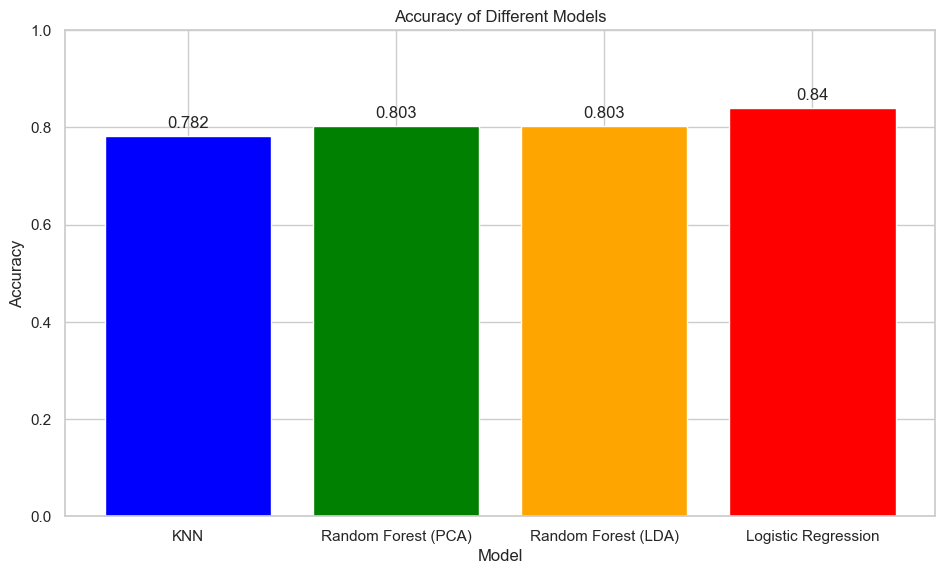

In [92]:
# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(results_table['Model'], results_table['Accuracy'], color=['blue', 'green', 'orange', 'red'])

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper scale
plt.show()

In [79]:
from sklearn.tree import plot_tree

# Create a RandomForestClassifier with the best hyperparameters
best_rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

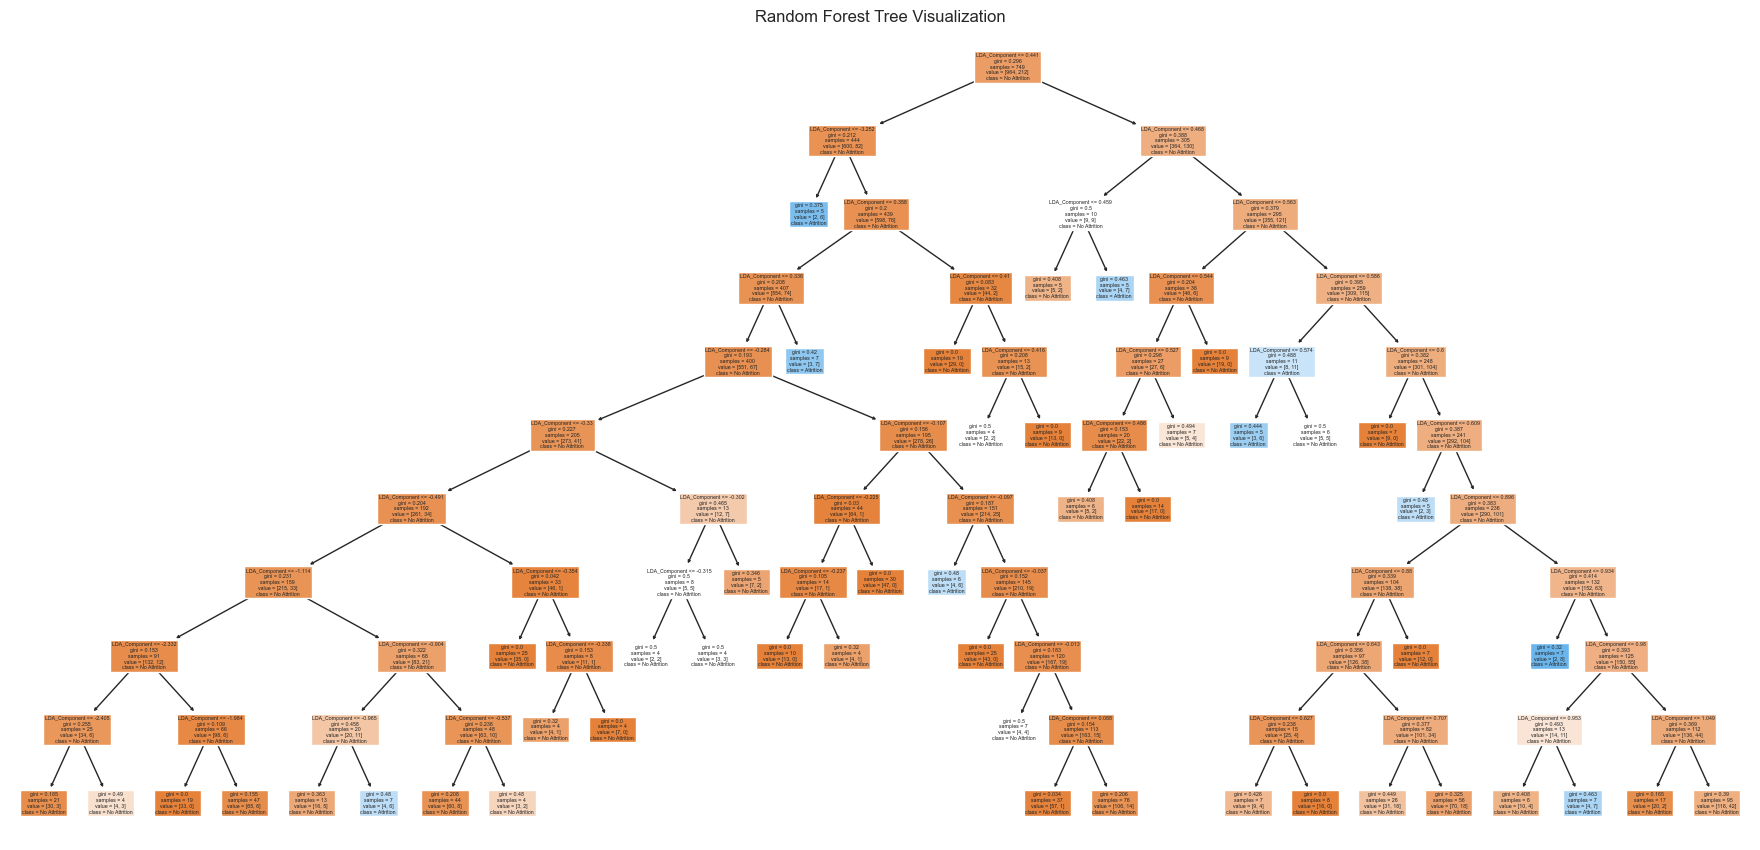

In [80]:
# Visualize an individual decision tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], feature_names=list(X_train.columns), class_names=['No Attrition', 'Attrition'], filled=True)
plt.title('Random Forest Tree Visualization')
plt.show()

# K-Fold cross-validation on



1.   Split on 10
2.   Split on 20
3.   Split on 30




In [81]:
from sklearn.model_selection import cross_val_score, KFold

# Combine training and test sets for cross-validation
X_combined = np.vstack((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))

In [82]:
# Initialize KFold with 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X_combined, y_combined, cv=kfold, scoring='accuracy')

# Print the accuracy for each fold
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score}')

# Print the mean accuracy across all folds
print(f'Mean Accuracy: {np.mean(cv_scores)}')

Fold 1: 0.7891156462585034
Fold 2: 0.7891156462585034
Fold 3: 0.7619047619047619
Fold 4: 0.8503401360544217
Fold 5: 0.8095238095238095
Fold 6: 0.8231292517006803
Fold 7: 0.8163265306122449
Fold 8: 0.8095238095238095
Fold 9: 0.8367346938775511
Fold 10: 0.8367346938775511
Mean Accuracy: 0.8122448979591835


k-fold cross-validation results indicate that the Random Forest model has a mean accuracy of around 81.2% using 10 splits. Shows the good performance.

In [83]:
# Initialize KFold with 20 folds
kfold = KFold(n_splits=20, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_rf_model, X_combined, y_combined, cv=kfold, scoring='accuracy')

for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score}')

print(f'Mean Accuracy: {np.mean(cv_scores)}')

Fold 1: 0.8108108108108109
Fold 2: 0.7567567567567568
Fold 3: 0.7702702702702703
Fold 4: 0.8243243243243243
Fold 5: 0.7432432432432432
Fold 6: 0.7702702702702703
Fold 7: 0.7972972972972973
Fold 8: 0.9054054054054054
Fold 9: 0.8243243243243243
Fold 10: 0.7702702702702703
Fold 11: 0.7945205479452054
Fold 12: 0.863013698630137
Fold 13: 0.8356164383561644
Fold 14: 0.7671232876712328
Fold 15: 0.821917808219178
Fold 16: 0.7945205479452054
Fold 17: 0.821917808219178
Fold 18: 0.821917808219178
Fold 19: 0.863013698630137
Fold 20: 0.8356164383561644
Mean Accuracy: 0.8096075527582377


In [84]:
# Initialize KFold with 30 folds
kfold = KFold(n_splits=30, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_rf_model, X_combined, y_combined, cv=kfold, scoring='accuracy')

for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score}')

print(f'Mean Accuracy: {np.mean(cv_scores)}')

Fold 1: 0.8775510204081632
Fold 2: 0.7551020408163265
Fold 3: 0.7551020408163265
Fold 4: 0.7959183673469388
Fold 5: 0.7346938775510204
Fold 6: 0.8367346938775511
Fold 7: 0.7142857142857143
Fold 8: 0.7959183673469388
Fold 9: 0.7346938775510204
Fold 10: 0.7959183673469388
Fold 11: 0.8775510204081632
Fold 12: 0.8775510204081632
Fold 13: 0.8163265306122449
Fold 14: 0.7959183673469388
Fold 15: 0.8163265306122449
Fold 16: 0.7755102040816326
Fold 17: 0.8163265306122449
Fold 18: 0.8571428571428571
Fold 19: 0.8367346938775511
Fold 20: 0.7755102040816326
Fold 21: 0.7551020408163265
Fold 22: 0.8367346938775511
Fold 23: 0.8163265306122449
Fold 24: 0.7755102040816326
Fold 25: 0.8367346938775511
Fold 26: 0.8163265306122449
Fold 27: 0.8571428571428571
Fold 28: 0.8571428571428571
Fold 29: 0.8775510204081632
Fold 30: 0.8367346938775511
Mean Accuracy: 0.8102040816326531


In [87]:
# Evaluate the performance of the logistic regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print(f'Accuracy of Logistic Regression: {accuracy_logreg}')
print(f'Confusion Matrix:\n{confusion_matrix_logreg}')
print(f'Classification Report:\n{classification_report_logreg}')

Accuracy of Logistic Regression: 0.8401360544217688
Confusion Matrix:
[[247   0]
 [ 47   0]]
Classification Report:
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       247
         Yes       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



C:\Users\zerokool5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zerokool5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zerokool5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classifica